<!DOCTYPE html>
<html>
<head>
    <title>Airbnb Price Prediction</title>
    <style>
        /* Styles for centering and formatting */
        body {
            font-family: Arial, sans-serif;
            text-align: center;
            background-color: #f0f0f0;
        }
        .container {
            max-width: 800px;
            margin: 0 auto;
            padding: 20px;
            background-color: #fff;
            border-radius: 10px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        .container img {
            max-width: 100%;
            height: auto;
            margin-bottom: 20px;
            border-radius: 5px;
        }
        h1 {
            font-size: 36px; /* Adjust the font size as needed */
            font-family: "Times New Roman", Times, serif; /* Use Times New Roman font */
        }
    </style>
</head>
<body>
    <div class="container">
        <!-- Verify that the image file path is correct -->
        <img src="problem.jpeg" alt="Airbnb Image">
        <h1>Airbnb Price Prediction</h1>
        <h1>Problem Statement</h1>
        <p>In a rapidly evolving Airbnb marketplace, the project's core mission is to develop a predictive model for rental prices that benefits hosts by maximizing revenue and guests by ensuring fair and competitive rates. This problem is crucial due to the challenges hosts face in pricing their listings accurately and the importance of pricing for guests when making booking decisions. Accurate pricing not only enhances customer satisfaction but also contributes to the overall success and growth of Airbnb.</p>
    </div>
</body>
</html>


## Feature Description


1. **id**: The unique identifier for each entry in the dataset.
2. **NAME**: The name associated with the accommodation listing.
3. **host id**: The unique identifier for the host of the accommodation.
4. **host_identity_verified**: A binary indicator (possibly 0 or 1) to show whether the host's identity has been verified.
5. **host name**: The name of the host.
6. **neighbourhood group**: The broader geographical grouping of neighborhoods.
7. **neighbourhood**: The specific neighborhood where the accommodation is located.
8. **lat**: Latitude coordinate of the accommodation.
9. **long**: Longitude coordinate of the accommodation.
10. **country**: The country where the accommodation is situated.
11. **country code**: The country code associated with the country.
12. **instant_bookable**: A binary indicator for whether the accommodation can be instantly booked.
13. **cancellation_policy**: The policy governing cancellations for bookings.
14. **room type**: The type of room offered in the accommodation.
15. **Construction year**: The year in which the accommodation was constructed.
16. **price**: The cost of booking the accommodation.
17. **service fee**: Fee associated with the service.
18. **minimum nights**: The minimum number of nights required for booking.
19. **number of reviews**: The total number of reviews received for the accommodation.
20. **last review**: The date of the last review.
21. **reviews per month**: The average number of reviews received per month.
22. **review rate number**: A metric or number related to the rate of reviews.
23. **calculated host listings count**: The count of listings attributed to the host.
24. **availability 365**: The number of days the accommodation is available over a year.
25. **house_rules**: Rules or policies associated with staying in the accommodation.
26. **license**: The license or legal documentation associated with the accommodation.


In [1]:
pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install catboost


     -------------------------------------- 101.0/101.0 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


# Import Library

In [2]:
# Data manipulation
import pandas as pd
# Numerical operations
import numpy as np
# Statistical data visualization
import seaborn as sns
# Plotting
import matplotlib.pyplot as plt
import warnings
# Filter out all warnings
warnings.filterwarnings("ignore")
# Reset warnings to default behavior
warnings.filterwarnings("default")
# Data splitting for training and testing
from sklearn.model_selection import train_test_split
# Linear regression model
from sklearn.linear_model import LinearRegression
# Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# CatBoost library
import catboost
# CatBoost Regressor
from catboost import CatBoostRegressor
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
# XGBoost library
import xgboost
# XGBoost Regressor
from xgboost import XGBRegressor
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
# Polynomial features for regression
from sklearn.preprocessing import PolynomialFeatures
# Grid search for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
# Cross-validation
from sklearn.model_selection import cross_val_score, KFold
# One-hot encoding for categorical features
from sklearn.preprocessing import OneHotEncoder
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import SGDRegressor
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
print("Import Library Successfully....!")


<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


Import Library Successfully....!


In [4]:
# Read CSV file into DataFrame
df = pd.read_csv('Airbnb_Open_Data.csv')

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
df.head()

First few rows of the DataFrame:


C:\Users\Shubham\AppData\Local\Temp\ipykernel_6904\758746959.py:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       $193            10.0   
1  40.75362 -73.98377  United States  ...        $28            30.0   
2  40.80902 -73.94190  United States  ...       $124             3.0   
3  40.68514 -73.95976  United States  ...        $74            30.0   
4  40.79851 -73.94399  United States  ...        $41            10.0   

  number of reviews last review  reviews per month review rate number  \
0               9.0  10/19/2021               0.21                4.0   
1              45.0   5/21/2022               0.38                4.0   
2               0.0         NaN                NaN                5.0   
3             270.0  07-05-2019               4.64                4.0   
4               9.0  11/19/2018               0.10                3.0   

  calculated host listings count  availability 365  \
0                            6.0             286.0   
1                            2.0             228.0   
2                            1.0             352.0   
3                            1.0             322.0   
4                            1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

In [3]:
# Display information about the DataFrame
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object

The dataset contains Airbnb listing details with information on hosts, property attributes, pricing, and availability, along with missing values in several columns, indicating potential data preprocessing requirements.

In [4]:
# Display a statistical summary of the DataFrame
print("Statistical Summary of the DataFrame:")
df.describe()

Statistical Summary of the DataFrame:


id       host id            lat           long  \
count  1.025990e+05  1.025990e+05  102591.000000  102591.000000   
mean   2.914623e+07  4.925411e+10      40.728094     -73.949644   
std    1.625751e+07  2.853900e+10       0.055857       0.049521   
min    1.001254e+06  1.236005e+08      40.499790     -74.249840   
25%    1.508581e+07  2.458333e+10      40.688740     -73.982580   
50%    2.913660e+07  4.911774e+10      40.722290     -73.954440   
75%    4.320120e+07  7.399650e+10      40.762760     -73.932350   
max    5.736742e+07  9.876313e+10      40.916970     -73.705220   

       Construction year  minimum nights  number of reviews  \
count      102385.000000   102190.000000      102416.000000   
mean         2012.487464        8.135845          27.483743   
std             5.765556       30.553781          49.508954   
min          2003.000000    -1223.000000           0.000000   
25%          2007.000000        2.000000           1.000000   
50%          2012.000000        3.000000           7.000000   
75%          2017.000000        5.000000          30.000000   
max          2022.000000     5645.000000        1024.000000   

       reviews per month  review rate number  calculated host listings count  \
count       86720.000000       102273.000000                   102280.000000   
mean            1.374022            3.279106                        7.936605   
std             1.746621            1.284657                       32.218780   
min             0.010000            1.000000                        1.000000   
25%             0.220000            2.000000                        1.000000   
50%             0.740000            3.000000                        1.000000   
75%             2.000000            4.000000                        2.000000   
max            90.000000            5.000000                      332.000000   

       availability 365  
count     102151.000000  
mean         141.133254  
std          135.435024  
min          -10.000000  
25%            3.000000  
50%           96.000000  
75%          269.000000  
max         3677.000000

### Data preparation and cleaning

In [5]:
# List of column names to analyze
index = df.columns

# Iterate through each column in the specified index
for col_name in index:
    # Print the value counts for each column
    print(df[col_name].value_counts(), "\n")
    # Print a separator line for better readability
    print("---------------------------------------------------------------")


6044940     2
6067584     2
6077525     2
6076973     2
6076421     2
           ..
19804390    1
19803837    1
19803285    1
19802733    1
57367417    1
Name: id, Length: 102058, dtype: int64 

---------------------------------------------------------------
Home away from home                               33
Hillside Hotel                                    30
Water View King Bed Hotel Room                    30
New york Multi-unit building                      27
Brooklyn Apartment                                27
                                                  ..
♂ ♀ Sunny Bedroom in Popular Brooklyn              1
♂ ♀ Large Room Close to Express Subway + Bus       1
Clean room in Soho/Nolita                          1
♂ ♀ Large Sunny Bedroom Walk to Express Subway     1
Parisian Style Apartment in Heart of Brooklyn      1
Name: NAME, Length: 61281, dtype: int64 

---------------------------------------------------------------
38729751923    2
3895711649     2
43698780331    2
8

In [6]:
# Count the number of duplicated rows in the DataFrame
print("Duplicates:",df.duplicated().sum())

# Drop duplicate rows and modify the DataFrame in place
df.drop_duplicates(inplace=True)

# Display the new shape of the DataFrame after removing duplicates
print("shape",df.shape)


Duplicates: 541
shape (102058, 26)


The dataset has 541 duplicate entries, resulting in a revised dataset of 102,058 unique entries and 26 columns, indicating potential data integrity concerns.


In [7]:
#The price and service fee columns appear to be in object format, 
#likely due to the presence of dollar signs and commas. 
#It would be beneficial to convert these columns to numeric types

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

<>:5: DeprecationWarning: invalid escape sequence '\$'
<>:6: DeprecationWarning: invalid escape sequence '\$'
<>:5: DeprecationWarning: invalid escape sequence '\$'
<>:6: DeprecationWarning: invalid escape sequence '\$'
C:\Users\aksha\AppData\Local\Temp\ipykernel_17124\1313676794.py:5: DeprecationWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\aksha\AppData\Local\Temp\ipykernel_17124\1313676794.py:6: DeprecationWarning: invalid escape sequence '\$'
  df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)


In [8]:
# List of column names to be dropped insignificant columns.
columns_to_drop = ['id', 'host id', 'host name', 'license', 'last review', 'NAME']

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [9]:
# Checking for the missing values and its precentage :
print("Shape:",df.shape)
values = df.isnull().sum()
percentage = 100*df.isnull().sum()/len(df)
table = pd.concat([values,percentage.round(2)],axis=1)
table.columns = ['No of missing values','Percent of missing values']
table[table['No of missing values']!=0].sort_values('Percent of missing values',ascending=False).style.background_gradient('OrRd')

Shape: (102058, 20)


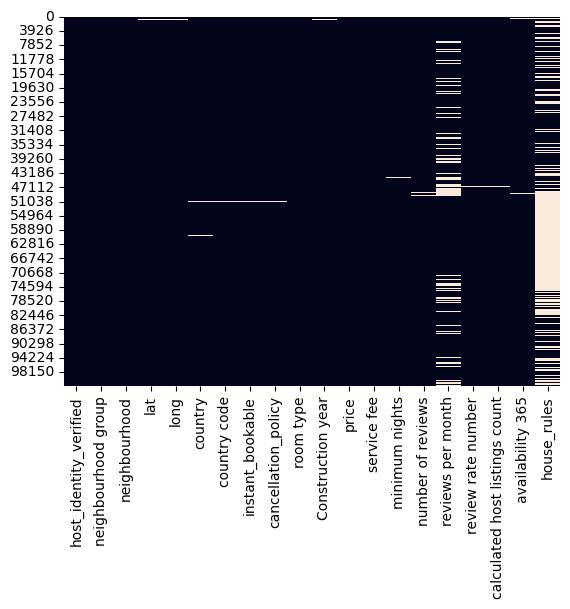

In [10]:
# Check the missing values with heatmap :

sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [11]:
numerical_columns = ['Construction year', 'price', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365','service fee']

In [12]:
from scipy.stats import skew
def replace_missing_numeric(df, symmetric_threshold=0.5):
    # Identify numeric columns with missing values
    numeric_columns = numerical_columns
    numeric_columns_with_missing = df[numeric_columns].columns[df[numeric_columns].isnull().any()]

    for column in numeric_columns_with_missing:
        # Check skewness to determine if the distribution is symmetric
        skewness = skew(df[column].dropna())
        
        if abs(skewness) <= symmetric_threshold:
            # Replace missing values with the mean for symmetric distributions
            df[column] = df[column].fillna(df[column].mean())
        else:
            # Replace missing values with the median for skewed distributions
            df[column] = df[column].fillna(df[column].median())

    return df

# Replace missing numeric values in selected_df
df = replace_missing_numeric(df)

In [13]:
# For categorical columns, we can consider filling missing values with the mode
categorical_columns = df.select_dtypes(include=object)
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
# Interpolating 'lat' and 'long' based on 'neighbourhood'
# Grouping by 'neighbourhood' and calculating the mean 'lat' and 'long'
mean_coords = df.groupby('neighbourhood')[['lat', 'long']].mean()
# Applying the mean coordinates to missing values
df = df.set_index('neighbourhood')
df['lat'].fillna(mean_coords['lat'], inplace=True)
df['long'].fillna(mean_coords['long'], inplace=True)
df.reset_index(inplace=True)

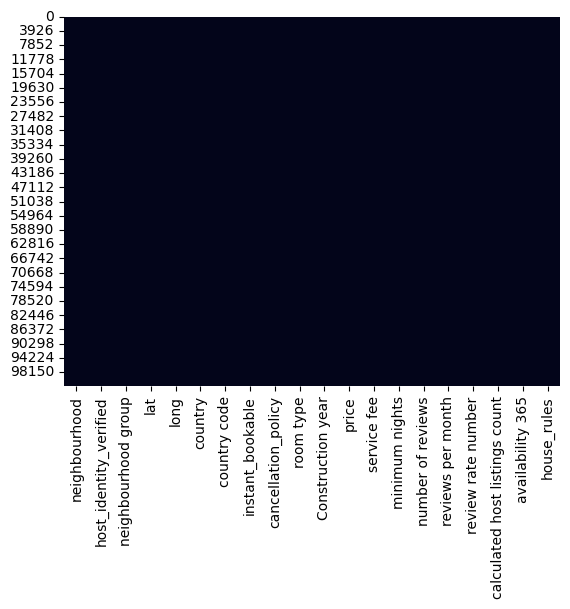

In [15]:
# Checking after filling  missing values:
values = df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102058 entries, 0 to 102057
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   neighbourhood                   102058 non-null  object 
 1   host_identity_verified          102058 non-null  object 
 2   neighbourhood group             102058 non-null  object 
 3   lat                             102058 non-null  float64
 4   long                            102058 non-null  float64
 5   country                         102058 non-null  object 
 6   country code                    102058 non-null  object 
 7   instant_bookable                102058 non-null  bool   
 8   cancellation_policy             102058 non-null  object 
 9   room type                       102058 non-null  object 
 10  Construction year               102058 non-null  float64
 11  price                           102058 non-null  float64
 12  service fee     

##### Outliers

In [17]:
# Numerical columns for checking outliers
col = ['lat', 'long', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']

In [18]:
# Summary statistics
mean = df[col].mean()
median = df[col].median()
std_dev = df[col].std()
print(f"Mean: {mean}, Median: {median}, Standard Deviation: {std_dev}")

Mean: lat                                 40.728098
long                               -73.949653
Construction year                 2012.488090
price                              625.355580
service fee                        125.039249
minimum nights                       8.106547
number of reviews                   27.481158
reviews per month                    1.276926
review rate number                   3.278733
calculated host listings count       7.915254
availability 365                   140.846264
dtype: float64, Median: lat                                 40.72229
long                               -73.95444
Construction year                 2012.00000
price                              625.35558
service fee                        125.00000
minimum nights                       3.00000
number of reviews                    7.00000
reviews per month                    0.74000
review rate number                   3.00000
calculated host listings count       1.00000
availability 3

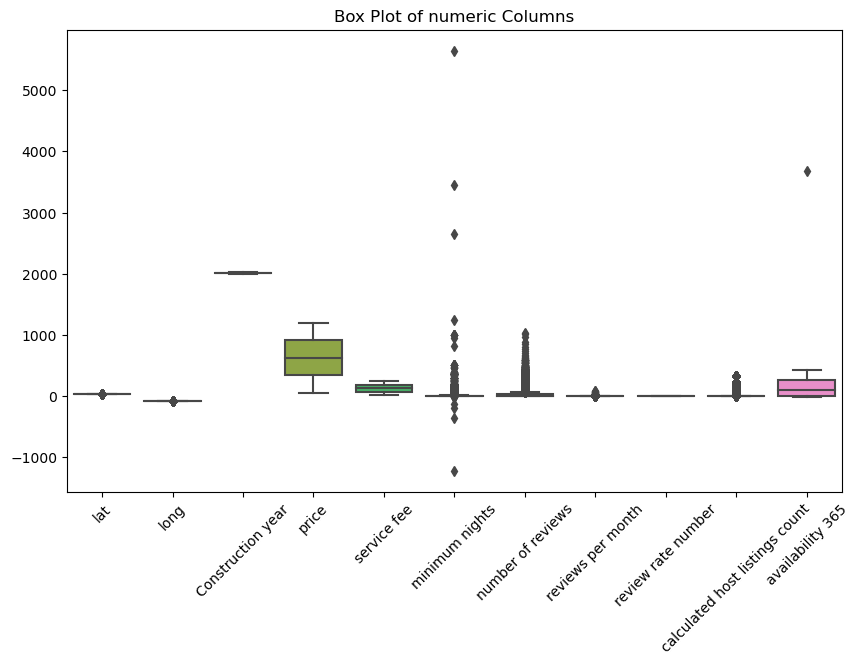

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['lat', 'long', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365']])
plt.title('Box Plot of numeric Columns')
plt.xticks(rotation=45)
plt.show()

In [20]:
def treat_outliers_iqr(data_with_outliers):
    numeric_columns = data_with_outliers.select_dtypes(include=np.number)
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data_with_outliers.copy()
    data[numeric_columns.columns] = data[numeric_columns.columns].apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))
    return data

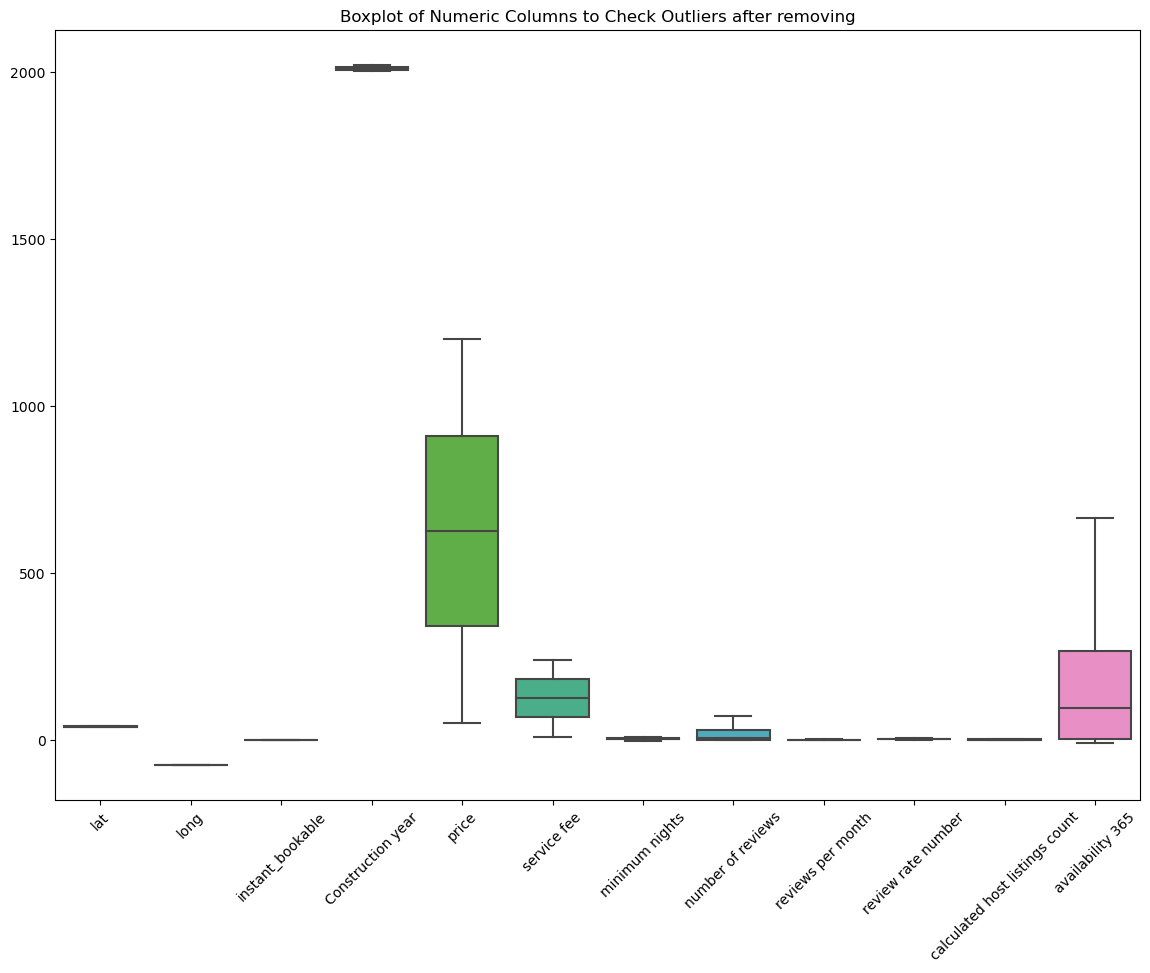

In [22]:
df= treat_outliers_iqr(df)
plt.figure(figsize=(14, 10))
sns.boxplot(data=df)
plt.title('Boxplot of Numeric Columns to Check Outliers after removing')
plt.xticks(rotation=45)
plt.show()

In [24]:
df = df[df['neighbourhood group'] != 'manhatan']
import numpy as np

# Replace inf with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with mode for each column
df = df.apply(lambda x: x.fillna(x.mode()[0]))

# Display the updated DataFrame
df.head()




neighbourhood host_identity_verified neighbourhood group       lat  \
0    Kensington            unconfirmed            Brooklyn  40.64749   
1       Midtown               verified           Manhattan  40.75362   
2        Harlem            unconfirmed           Manhattan  40.80902   
3  Clinton Hill            unconfirmed            Brooklyn  40.68514   
4   East Harlem               verified           Manhattan  40.79851   

       long        country country code  instant_bookable cancellation_policy  \
0 -73.97237  United States           US             False              strict   
1 -73.98377  United States           US             False            moderate   
2 -73.94190  United States           US              True            flexible   
3 -73.95976  United States           US              True            moderate   
4 -73.94399  United States           US             False            moderate   

         room type  Construction year  price  service fee  minimum nights  \
0     Private room             2020.0  966.0        193.0             9.5   
1  Entire home/apt             2007.0  142.0         28.0             9.5   
2     Private room             2005.0  620.0        124.0             3.0   
3  Entire home/apt             2005.0  368.0         74.0             9.5   
4  Entire home/apt             2009.0  204.0         41.0             9.5   

   number of reviews  reviews per month  review rate number  \
0                9.0              0.210                 4.0   
1               45.0              0.380                 4.0   
2                0.0              0.740                 5.0   
3               73.5              3.855                 4.0   
4                9.0              0.100                 3.0   

   calculated host listings count  availability 365  \
0                             3.5             286.0   
1                             2.0             228.0   
2                             1.0             352.0   
3                             1.0             322.0   
4                             1.0             289.0   

                                         house_rules  
0  Clean up and treat the home the way you'd like...  
1  Pet friendly but please confirm with me if the...  
2  I encourage you to use my kitchen, cooking and...  
3                                             #NAME?  
4  Please no smoking in the house, porch or on th...

In [25]:
df['neighbourhood group'].value_counts()

Manhattan        43586
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
Name: neighbourhood group, dtype: int64

## Univariate ,Bivariate and Multivariate Analaysis

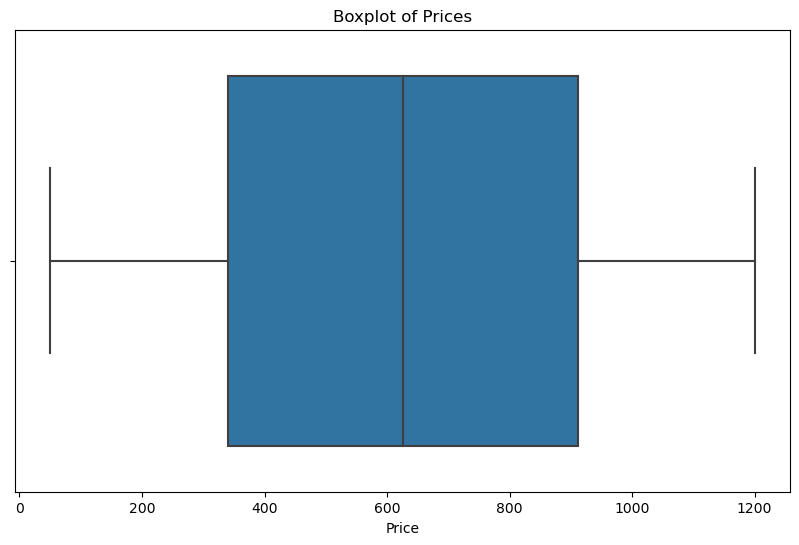

In [26]:
# Boxplot for Prices (to identify outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Prices')
plt.xlabel('Price')
plt.show()

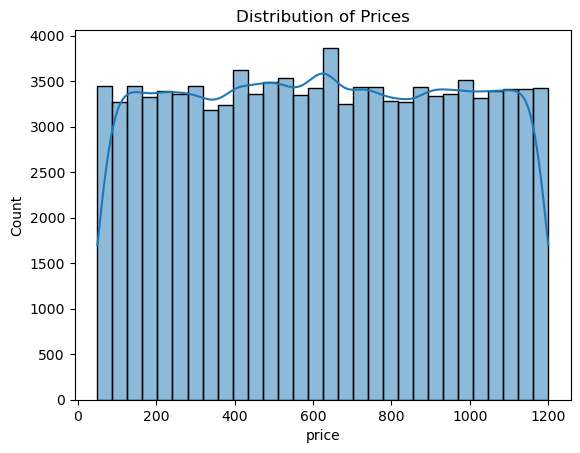

In [27]:
# Create a histogram of the 'price' column with 30 bins and a kernel density estimate (kde)
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.show()


In [28]:
# Room Type with More Strict Cancellation Policy
strict_cancellation = df.groupby('room type')['cancellation_policy'].value_counts().unstack()
print("Room type with the most strict cancellation policy:")
print(strict_cancellation)

Room type with the most strict cancellation policy:
cancellation_policy  flexible  moderate  strict
room type                                      
Entire home/apt         17830     17869   17730
Hotel room                 44        37      34
Private room            15282     15595   15428
Shared room               735       736     737


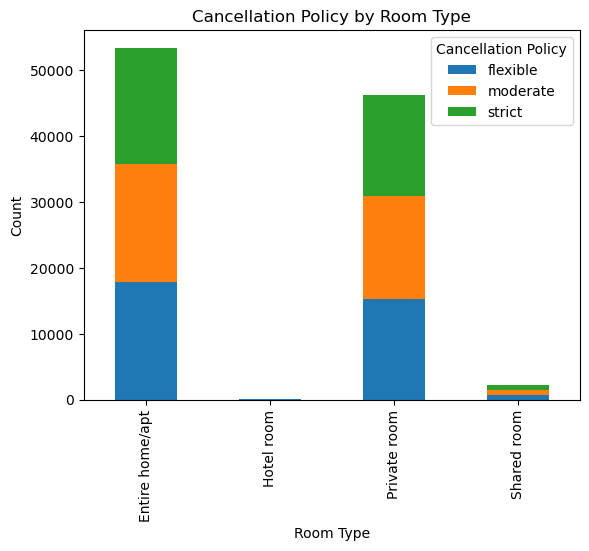

In [29]:
# Which room type adheres to a more strict cancellation policy in Bar Graph
strict_cancellation.plot(kind='bar', stacked=True)
plt.title('Cancellation Policy by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Policy')
plt.show()

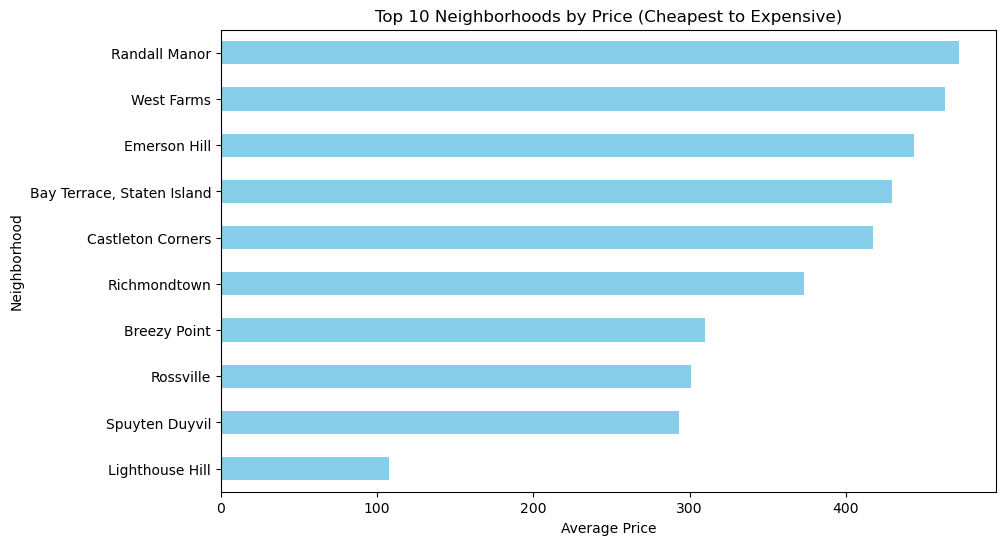

In [30]:
# List the top 10 neighborhoods in increasing order of their price with a horizontal bar graph
top_10_neighborhoods = df.groupby('neighbourhood')['price'].mean().sort_values().head(10)
plt.figure(figsize=(10, 6))
top_10_neighborhoods.plot(kind='barh', color='skyblue')
plt.title('Top 10 Neighborhoods by Price (Cheapest to Expensive)')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

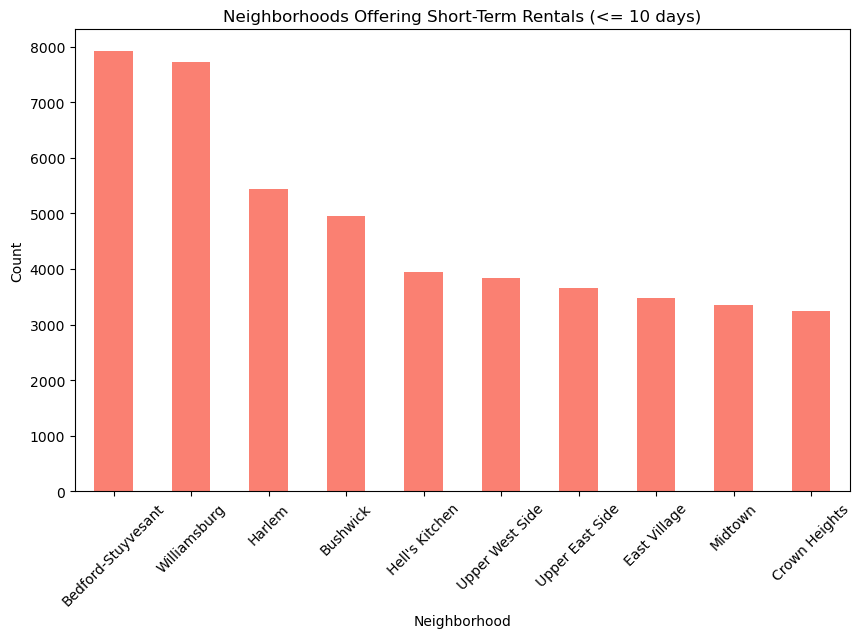

In [31]:
# List the neighborhoods offering short-term rentals within 10 days and illustrate with a bar graph
short_term_rentals = df[df['minimum nights'] <= 10]['neighbourhood'].value_counts().head(10)
plt.figure(figsize=(10, 6))
short_term_rentals.plot(kind='bar', color='salmon')
plt.title('Neighborhoods Offering Short-Term Rentals (<= 10 days)')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

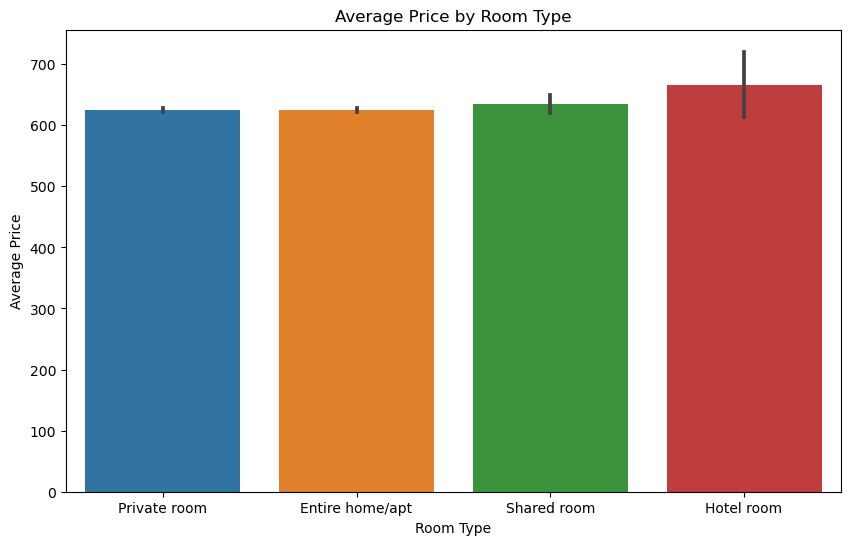

In [32]:
# Room Type vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='room type', y='price', data=df)
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.show()

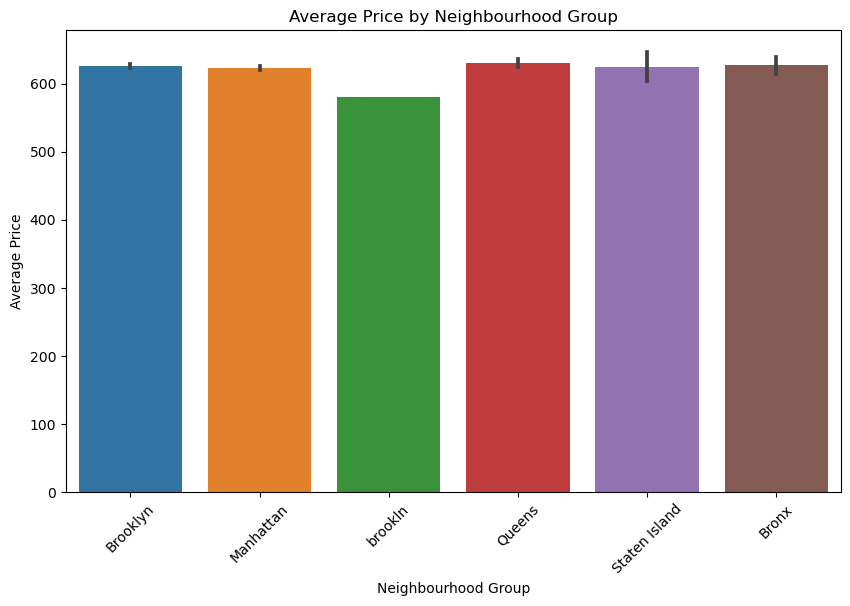

In [33]:
# Neighbourhood Group vs Price
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood group', y='price', data=df)
plt.title('Average Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

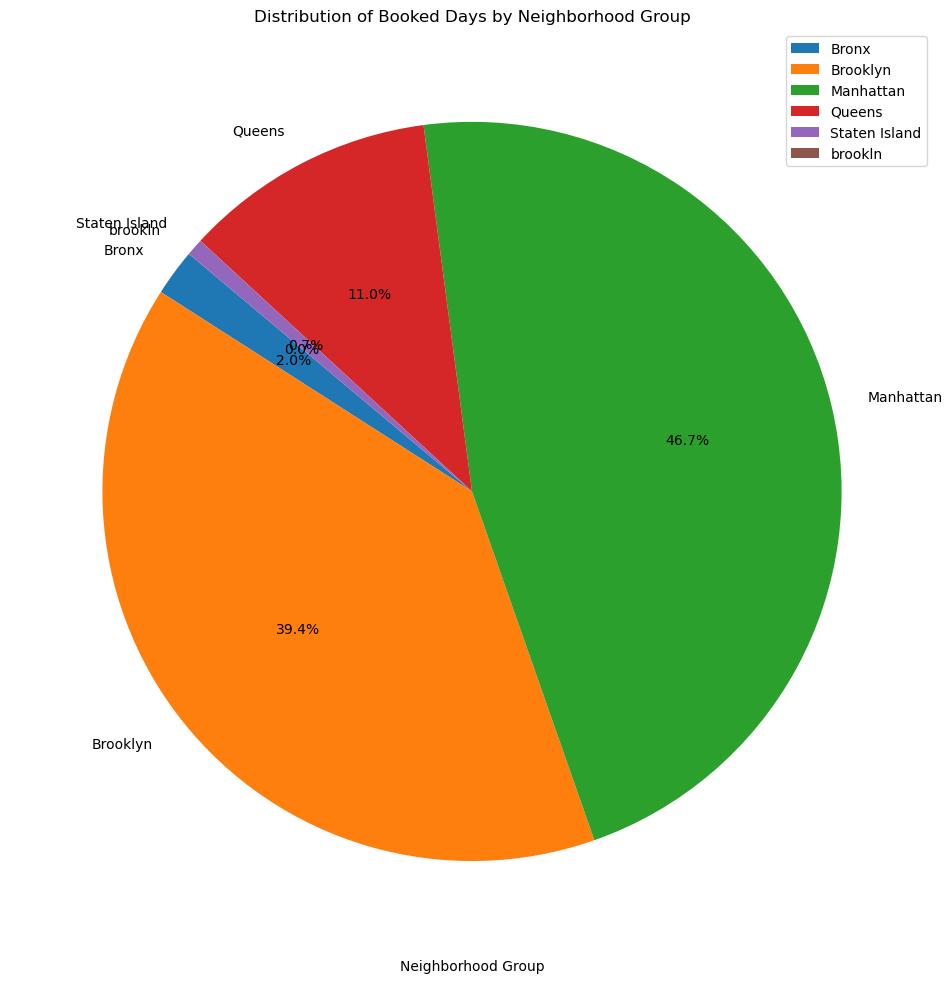

In [35]:
# Create a pie chart showing the distribution of booked days for each neighborhood group
booking_days = df.groupby('neighbourhood group')['minimum nights'].sum()
plt.figure(figsize=(14, 12))
pie_chart = booking_days.plot(kind='pie', autopct='%1.1f%%', startangle=140, labeldistance=1.1)
plt.title('Distribution of Booked Days by Neighborhood Group')
plt.xlabel('Neighborhood Group')
plt.ylabel('') 
plt.legend(labels=booking_days.index, loc='upper right')
plt.show()


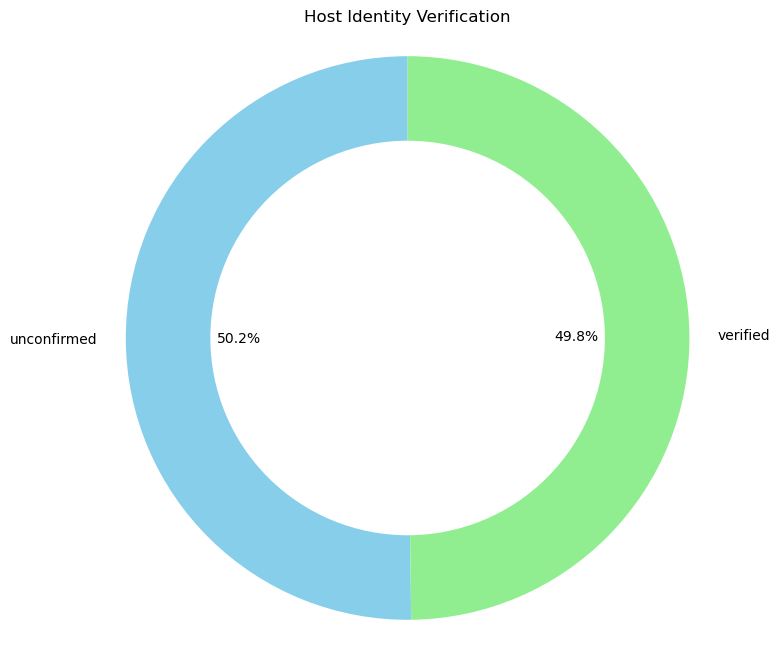

In [36]:
verification_counts = df['host_identity_verified'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(verification_counts, labels=verification_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Host Identity Verification')
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')  
plt.show()

In [37]:
for column in df.columns:
    
    if df[column].isnull().sum() != 0:
        
        print("========================================")
        print("\n{} :- {},  dtypes : {}".format(column,df[column].isnull().sum(),df[column].dtypes))

C:\Users\aksha\AppData\Local\Temp\ipykernel_17124\1441518634.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["review rate number"])


<Axes: xlabel='review rate number', ylabel='Density'>

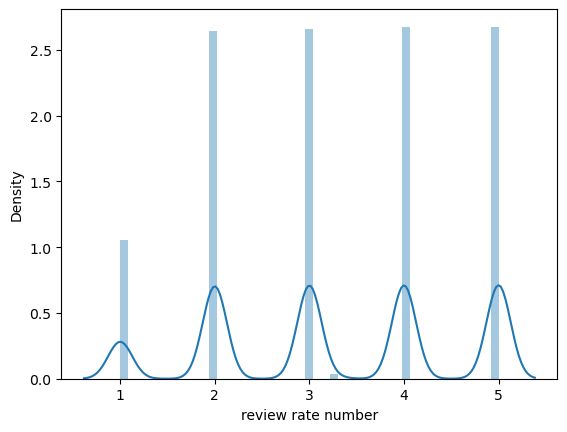

In [38]:
sns.distplot(df["review rate number"])

In [39]:
# Creating new features
#'price_per_night' - price divided by minimum nights (if minimum nights is 0, set to 1 to avoid division by zero)
df['minimum nights'] = df['minimum nights'].replace(0, 1)
df['price_per_night'] = df['price'] / df['minimum nights']

In [40]:
df["review rate number"] = df["review rate number"].fillna(0)

In [41]:
# Function to plot catplot graphs
def plot_catplot(h,v,he,a):
    sns.set(font_scale=1.5)
    sns.catplot(x=h,kind=v,data=df,height=he, aspect = a)
    
# Function to plot catplot graphs
def plot_piechart(h):
    sns.set(font_scale=1.5)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('equal')
    langs = list(df[h].unique())
    students =list(df[h].value_counts())
    ax.pie(students, labels = langs,autopct='%1.2f%%')
    plt.show()

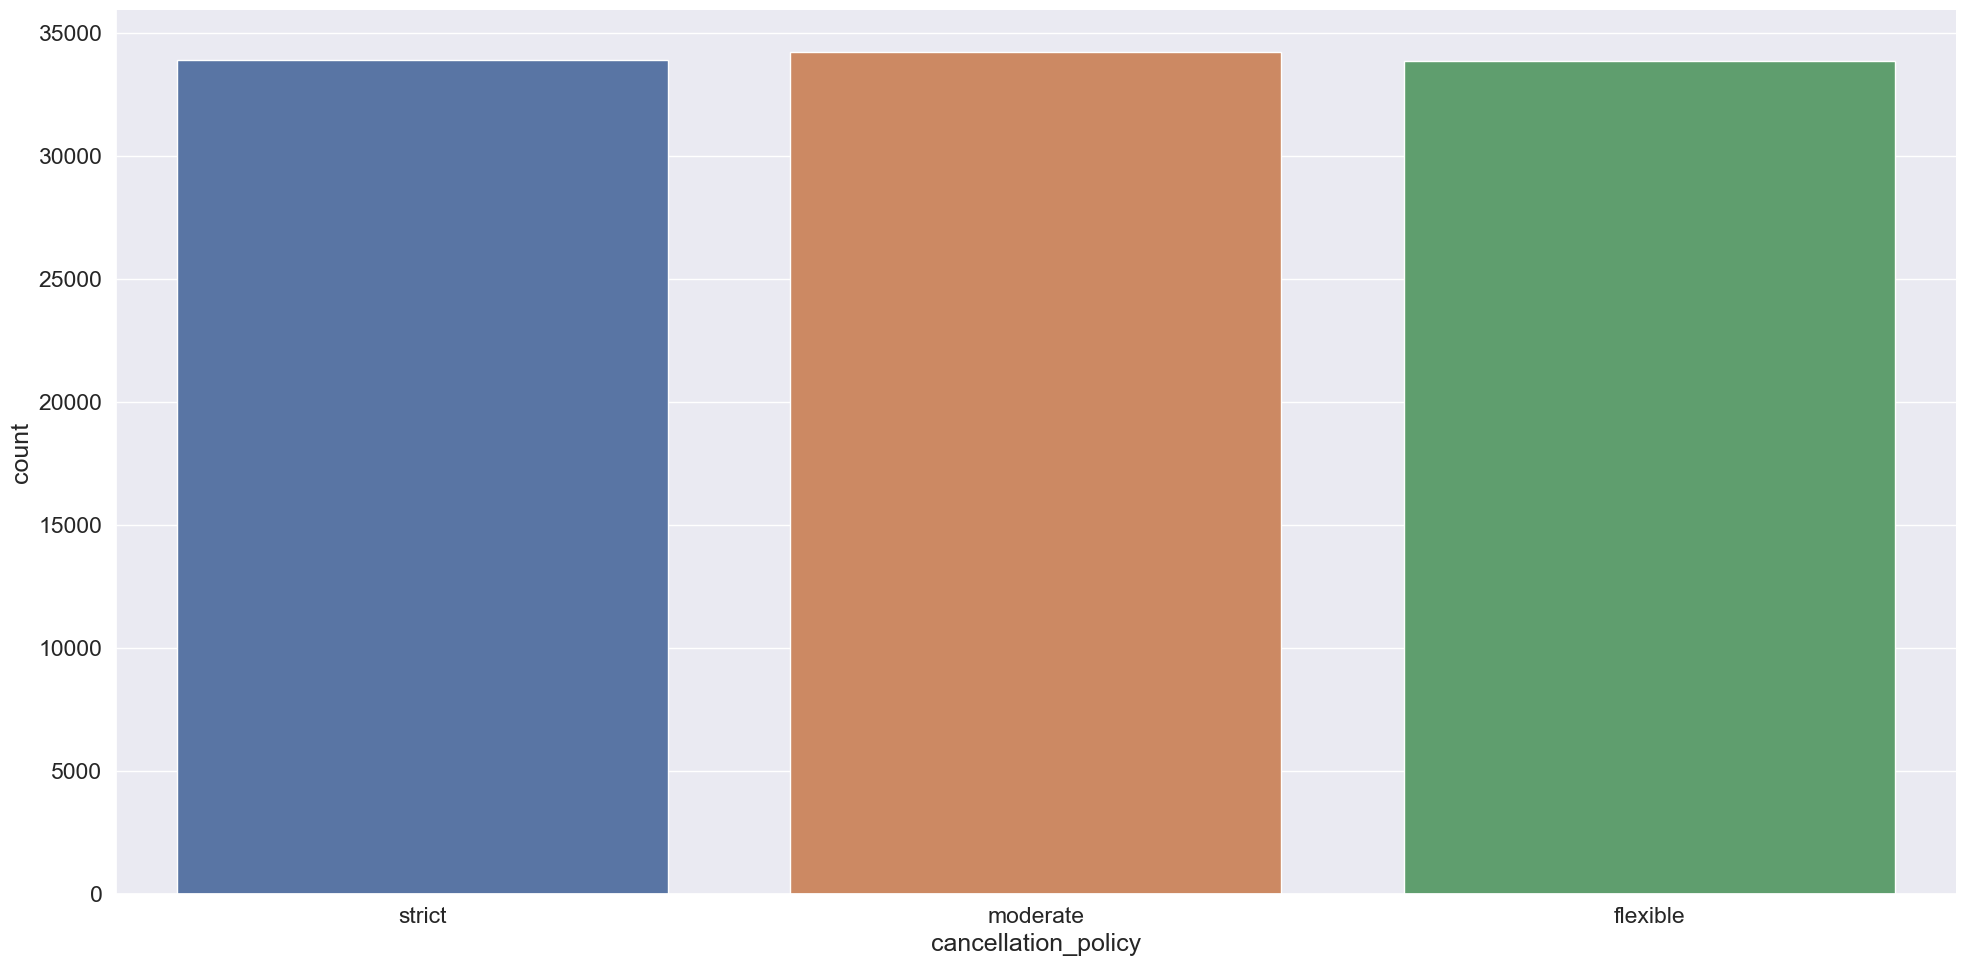

In [42]:
plot_catplot("cancellation_policy" , "count",10, 2)

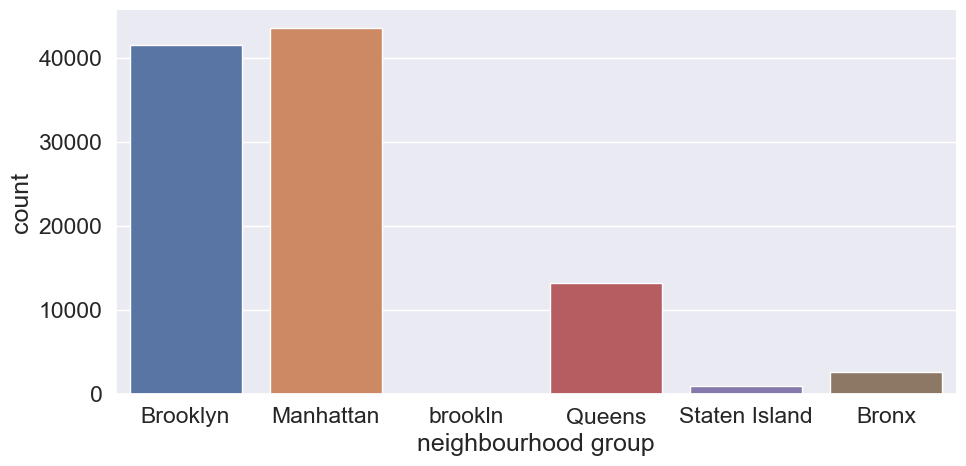

In [43]:
plot_catplot("neighbourhood group","count", 5, 2)

In [48]:
def plot_violinplot(h,v):
    plt.figure(figsize=(10,8))
    sns.set(font_scale=1.5)
    sns.violinplot(data=df, x=h, y=v, palette='GnBu_d')
    plt.title('Density and distribution of prices ', fontsize=15)
    plt.xlabel(h)
    plt.ylabel(v)

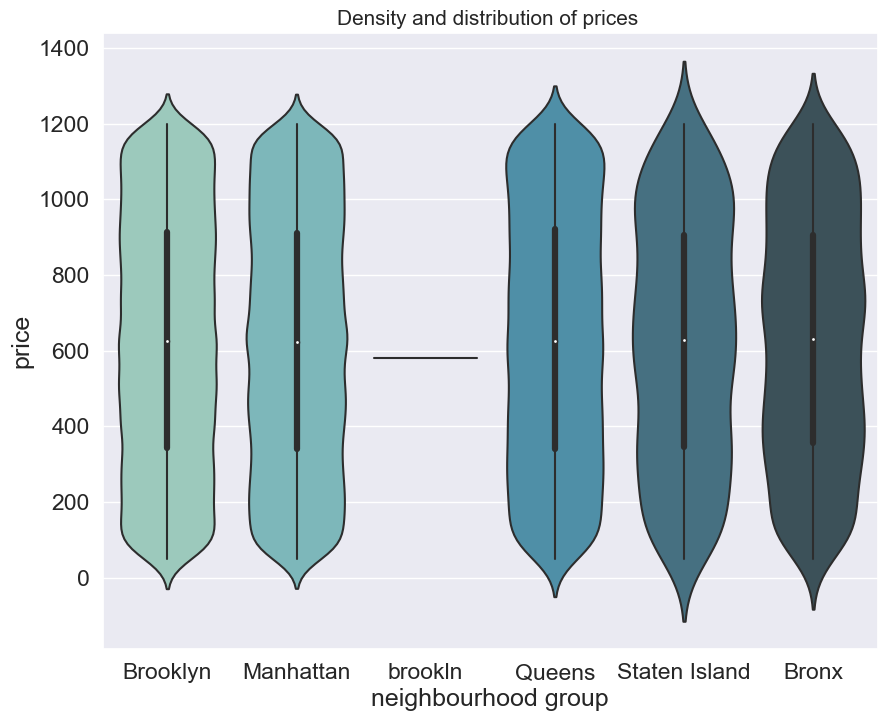

In [49]:
plot_violinplot("neighbourhood group","price")

<Figure size 1000x800 with 0 Axes>

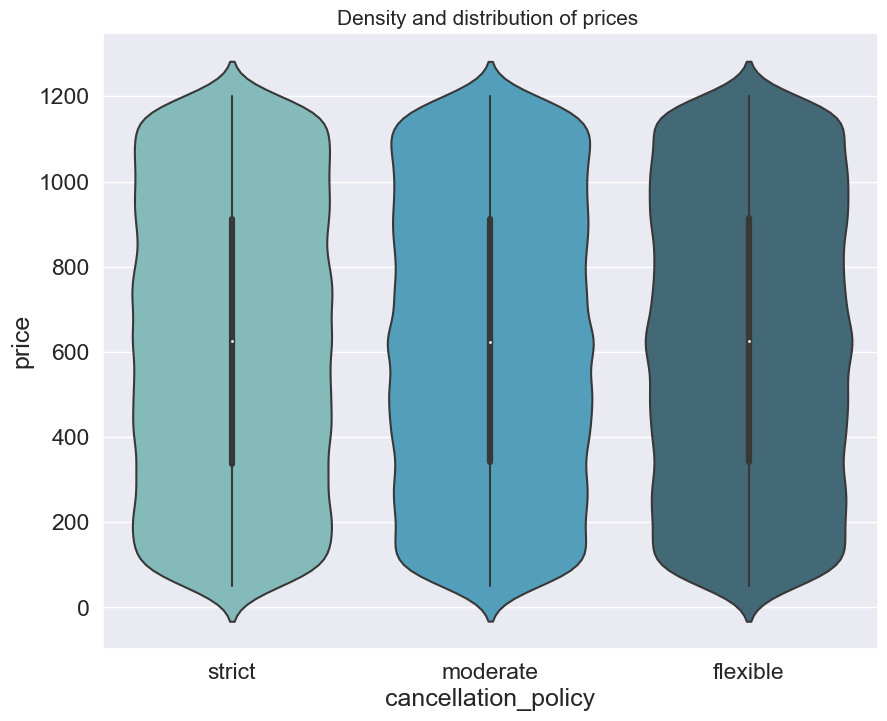

In [52]:
plt.figure(figsize=(10,8))
plot_violinplot("cancellation_policy","price")


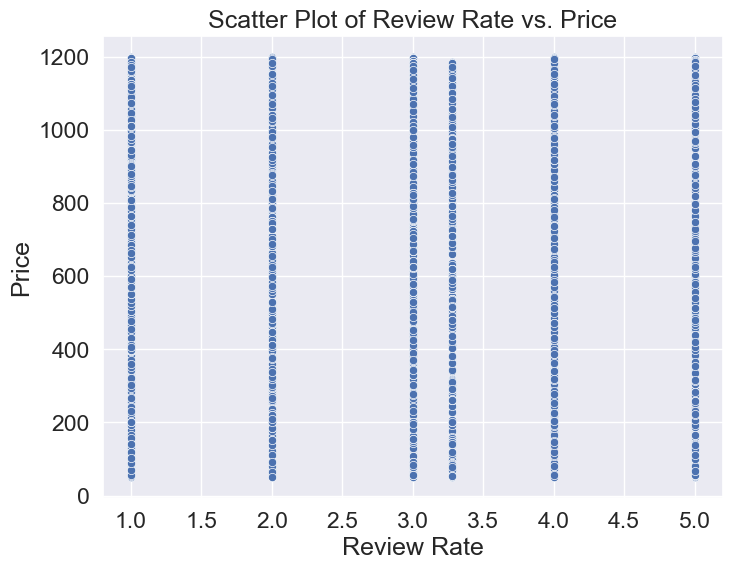

In [53]:
# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review rate number', y='price', data=df)
plt.title('Scatter Plot of Review Rate vs. Price')
plt.xlabel('Review Rate')
plt.ylabel('Price')
plt.show()

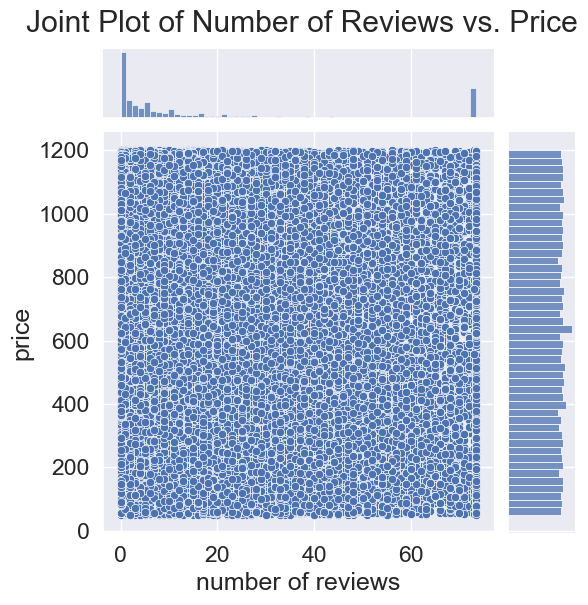

In [54]:
# Create joint plot
sns.jointplot(x='number of reviews', y='price', data=df, kind='scatter')
plt.suptitle('Joint Plot of Number of Reviews vs. Price', y=1.02)
plt.show()

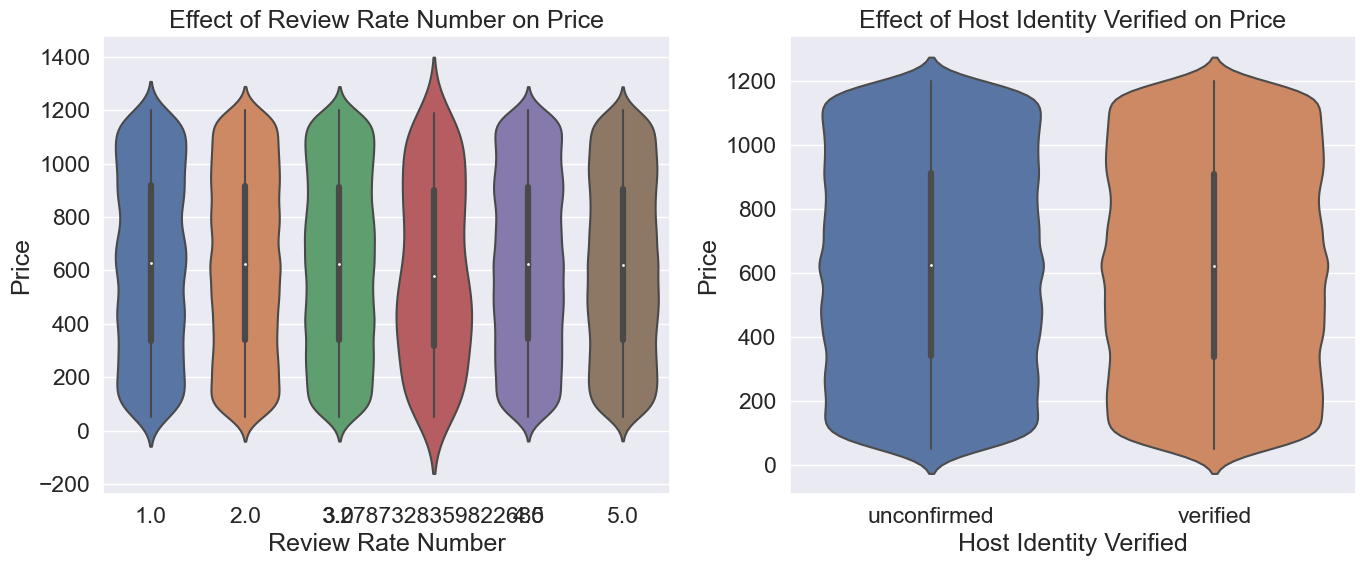

In [55]:
plt.figure(figsize=(14, 6))

# Violin plot for Review Rate Number vs. Price
plt.subplot(1, 2, 1)
sns.violinplot(x='review rate number', y='price', data=df)
plt.title('Effect of Review Rate Number on Price')
plt.xlabel('Review Rate Number')
plt.ylabel('Price')

# Violin plot for Host Identity Verified vs. Price
plt.subplot(1, 2, 2)
sns.violinplot(x='host_identity_verified', y='price', data=df)
plt.title('Effect of Host Identity Verified on Price')
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')

plt.tight_layout()
plt.show()

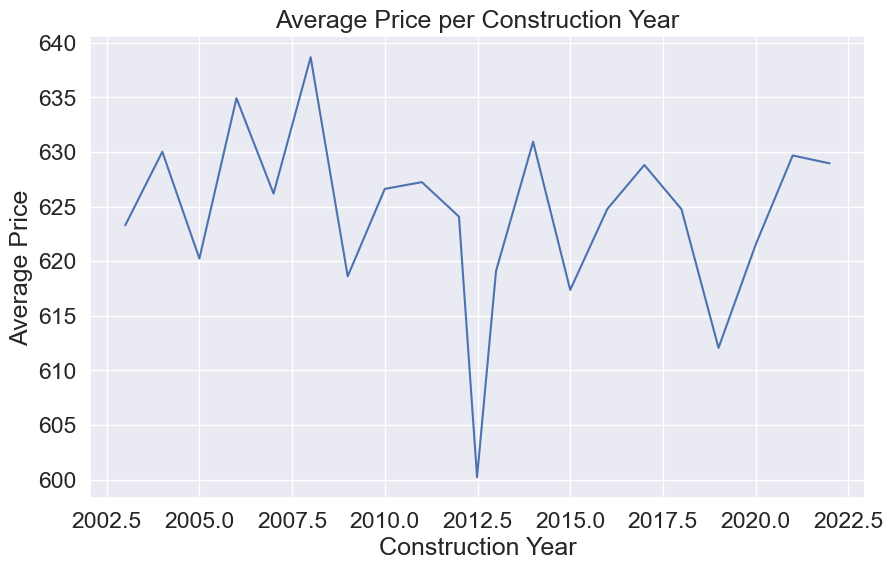

In [56]:
# Create a line plot (average price per year)
average_price_per_year = df.groupby('Construction year')['price'].mean()
plt.figure(figsize=(10, 6))
average_price_per_year.plot()
plt.title('Average Price per Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### Visualize the Time Series Data

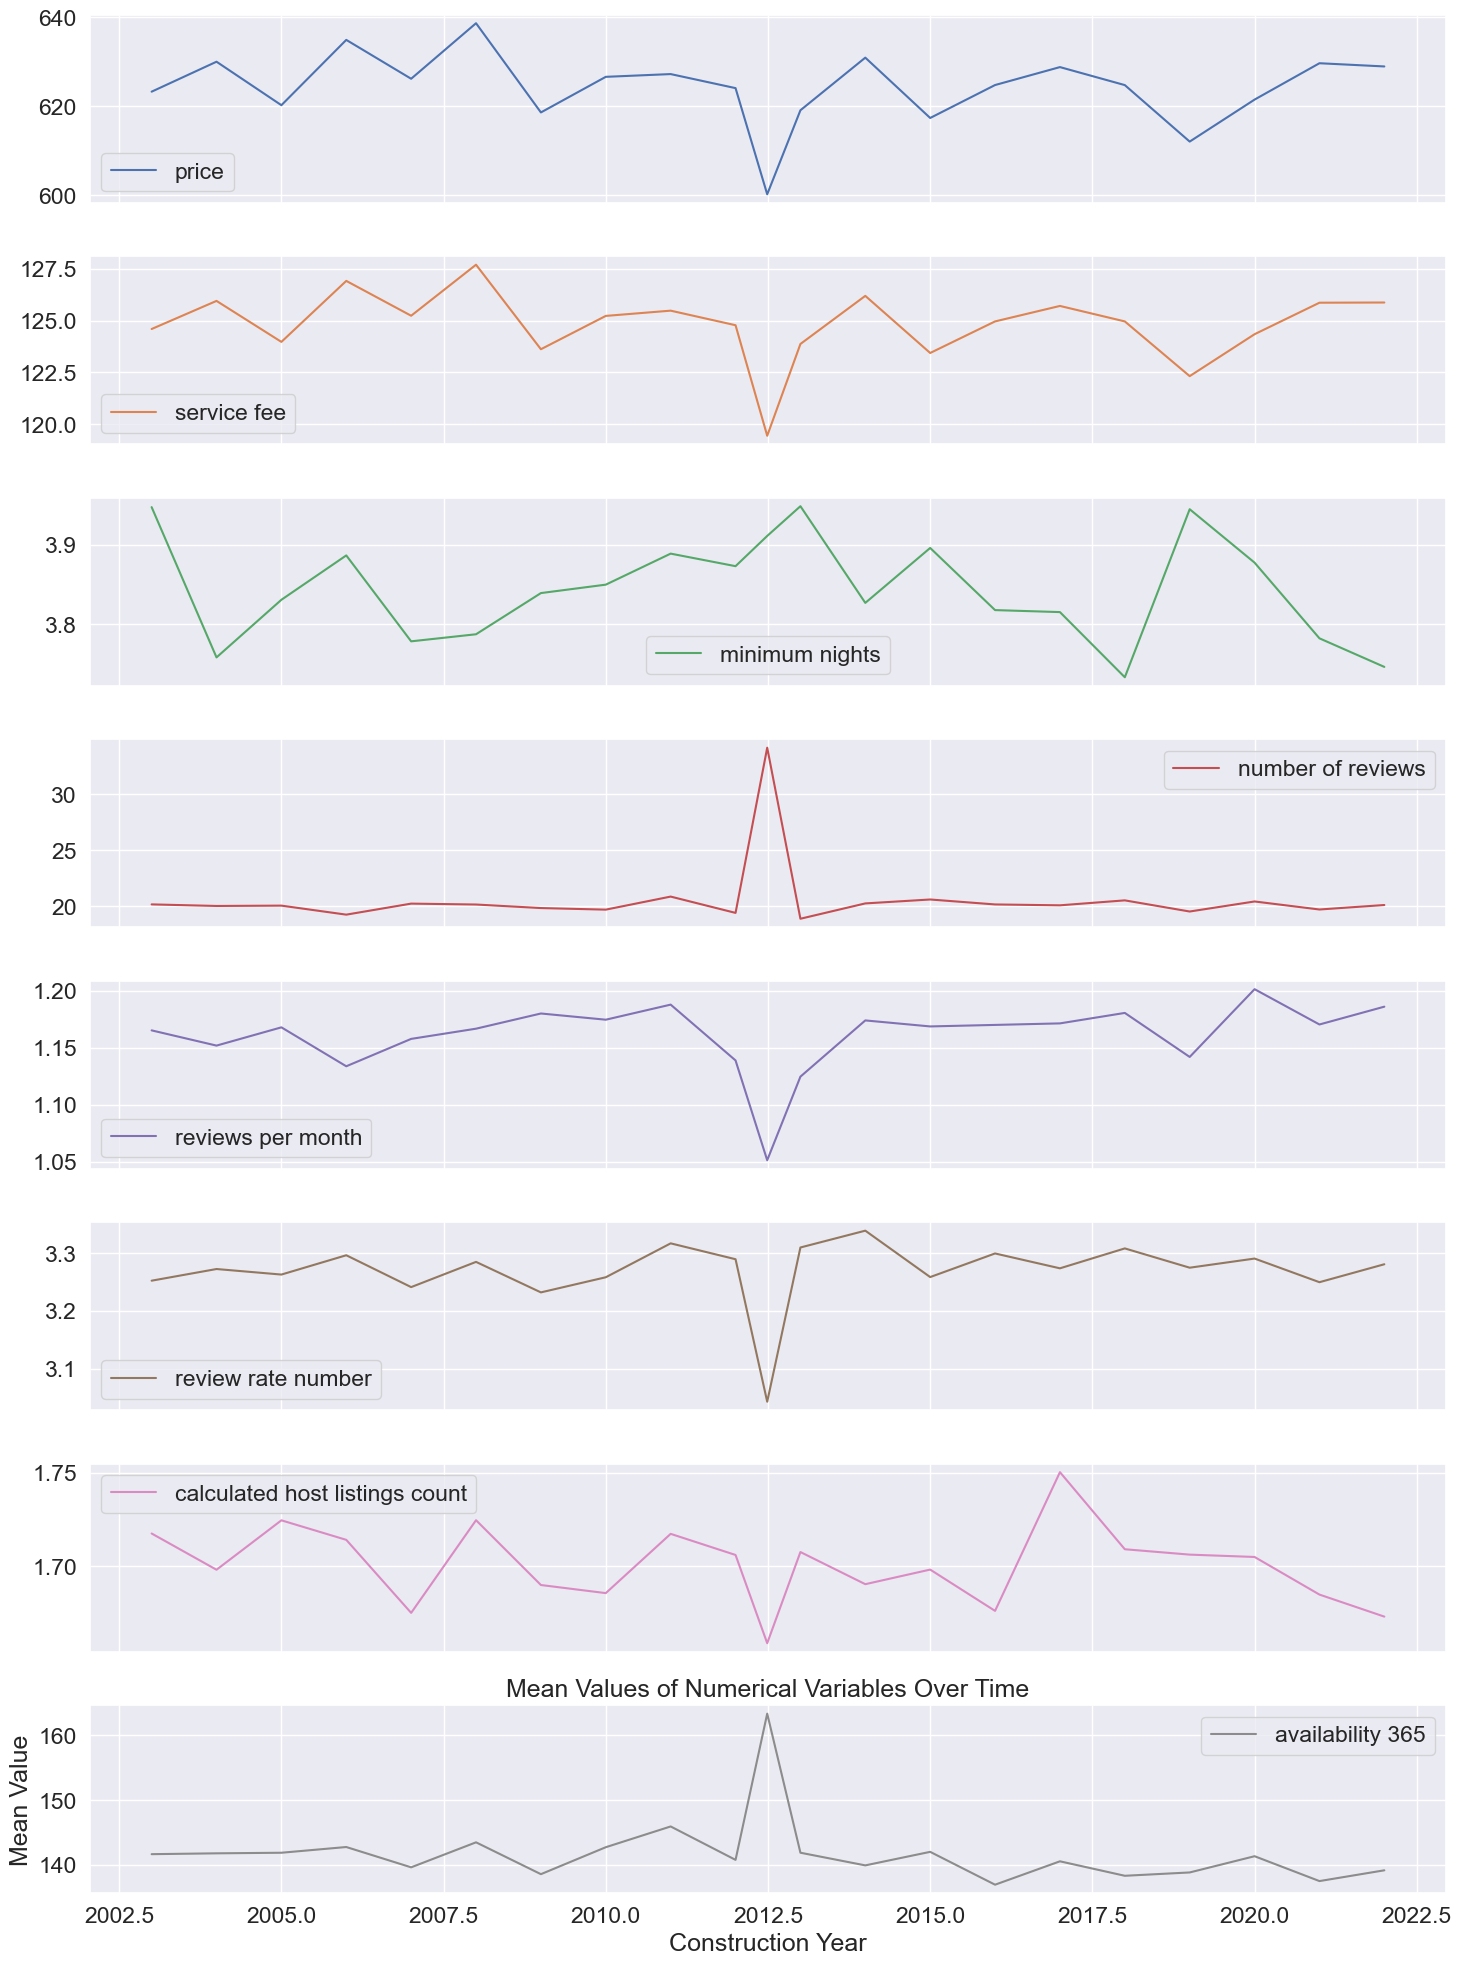

In [57]:
# Group by construction year and calculate the mean of each numerical variable
mean_values_by_year = df.groupby('Construction year')[['price', 'service fee', 'minimum nights', 'number of reviews', 
                                                       'reviews per month', 'review rate number', 
                                                       'calculated host listings count', 'availability 365']].mean()

mean_values_by_year.plot(kind='line', figsize=(15, 20), subplots=True)
plt.title('Mean Values of Numerical Variables Over Time')
plt.xlabel('Construction Year')
plt.ylabel('Mean Value')
plt.tight_layout()  
plt.show()


## Categorical relation

In [58]:
# Selecting categorical columns for encoding
categorical_columns = ['host_identity_verified', 'neighbourhood group', 'room type', 'instant_bookable', 'cancellation_policy']

In [59]:
# Applying one-hot encoding
onehot_encoder = OneHotEncoder(sparse=False, drop='first') 
encoded_data = pd.DataFrame(onehot_encoder.fit_transform(df[categorical_columns]))
encoded_data.columns = onehot_encoder.get_feature_names_out(categorical_columns)

E:\Softwares\anaconda\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [60]:
# Dropping original categorical columns and adding encoded columns
#data_fe variable created for feature engineering the cleaned data
data_feature = df.drop(columns=categorical_columns)
data_feature = pd.concat([data_feature, encoded_data], axis=1)

In [61]:
# Dropping all non numeric categorical columns
non_num_columns = ['country code', 'neighbourhood', 'country', 'house_rules']
data_feature = data_feature.drop(columns=non_num_columns,axis=1)
data_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102058 entries, 0 to 18
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   lat                                102057 non-null  float64
 1   long                               102057 non-null  float64
 2   Construction year                  102057 non-null  float64
 3   price                              102057 non-null  float64
 4   service fee                        102057 non-null  float64
 5   minimum nights                     102057 non-null  float64
 6   number of reviews                  102057 non-null  float64
 7   reviews per month                  102057 non-null  float64
 8   review rate number                 102057 non-null  float64
 9   calculated host listings count     102057 non-null  float64
 10  availability 365                   102057 non-null  float64
 11  price_per_night                    102057 n

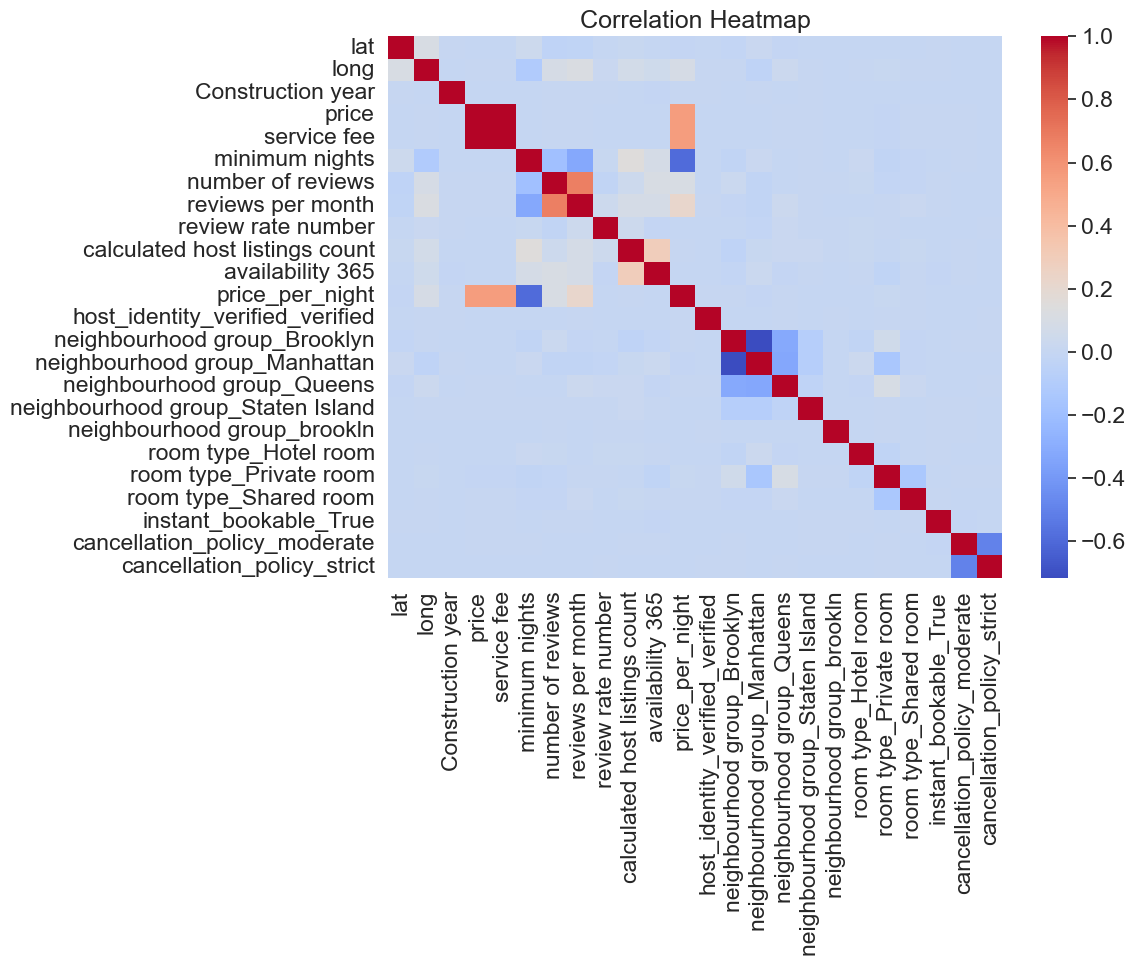

In [63]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data_feature.corr(), annot=False, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [64]:
categorical_col = []
for column in df.columns:
    
    if df[column].dtypes != "float64" and df[column].dtypes != "int64":
        categorical_col.append(column)
        

In [65]:
categorical_col

['neighbourhood',
 'host_identity_verified',
 'neighbourhood group',
 'country',
 'country code',
 'instant_bookable',
 'cancellation_policy',
 'room type',
 'house_rules']

In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_col:
    df[col] = le.fit_transform(df[col])

In [67]:
df.head()

neighbourhood  host_identity_verified  neighbourhood group       lat  \
0            111                       0                    1  40.64749   
1            130                       1                    2  40.75362   
2             97                       0                    2  40.80902   
3             42                       0                    1  40.68514   
4             62                       1                    2  40.79851   

       long  country  country code  instant_bookable  cancellation_policy  \
0 -73.97237        0             0                 0                    2   
1 -73.98377        0             0                 0                    1   
2 -73.94190        0             0                 1                    0   
3 -73.95976        0             0                 1                    1   
4 -73.94399        0             0                 0                    1   

   room type  ...  price  service fee  minimum nights  number of reviews  \
0          2  ...  966.0        193.0             9.5                9.0   
1          0  ...  142.0         28.0             9.5               45.0   
2          2  ...  620.0        124.0             3.0                0.0   
3          0  ...  368.0         74.0             9.5               73.5   
4          0  ...  204.0         41.0             9.5                9.0   

   reviews per month  review rate number  calculated host listings count  \
0              0.210                 4.0                             3.5   
1              0.380                 4.0                             2.0   
2              0.740                 5.0                             1.0   
3              3.855                 4.0                             1.0   
4              0.100                 3.0                             1.0   

   availability 365  house_rules  price_per_night  
0             286.0          444       101.684211  
1             228.0         1218        14.947368  
2             352.0          583       206.666667  
3             322.0            2        38.736842  
4             289.0         1368        21.473684  

[5 rows x 21 columns]

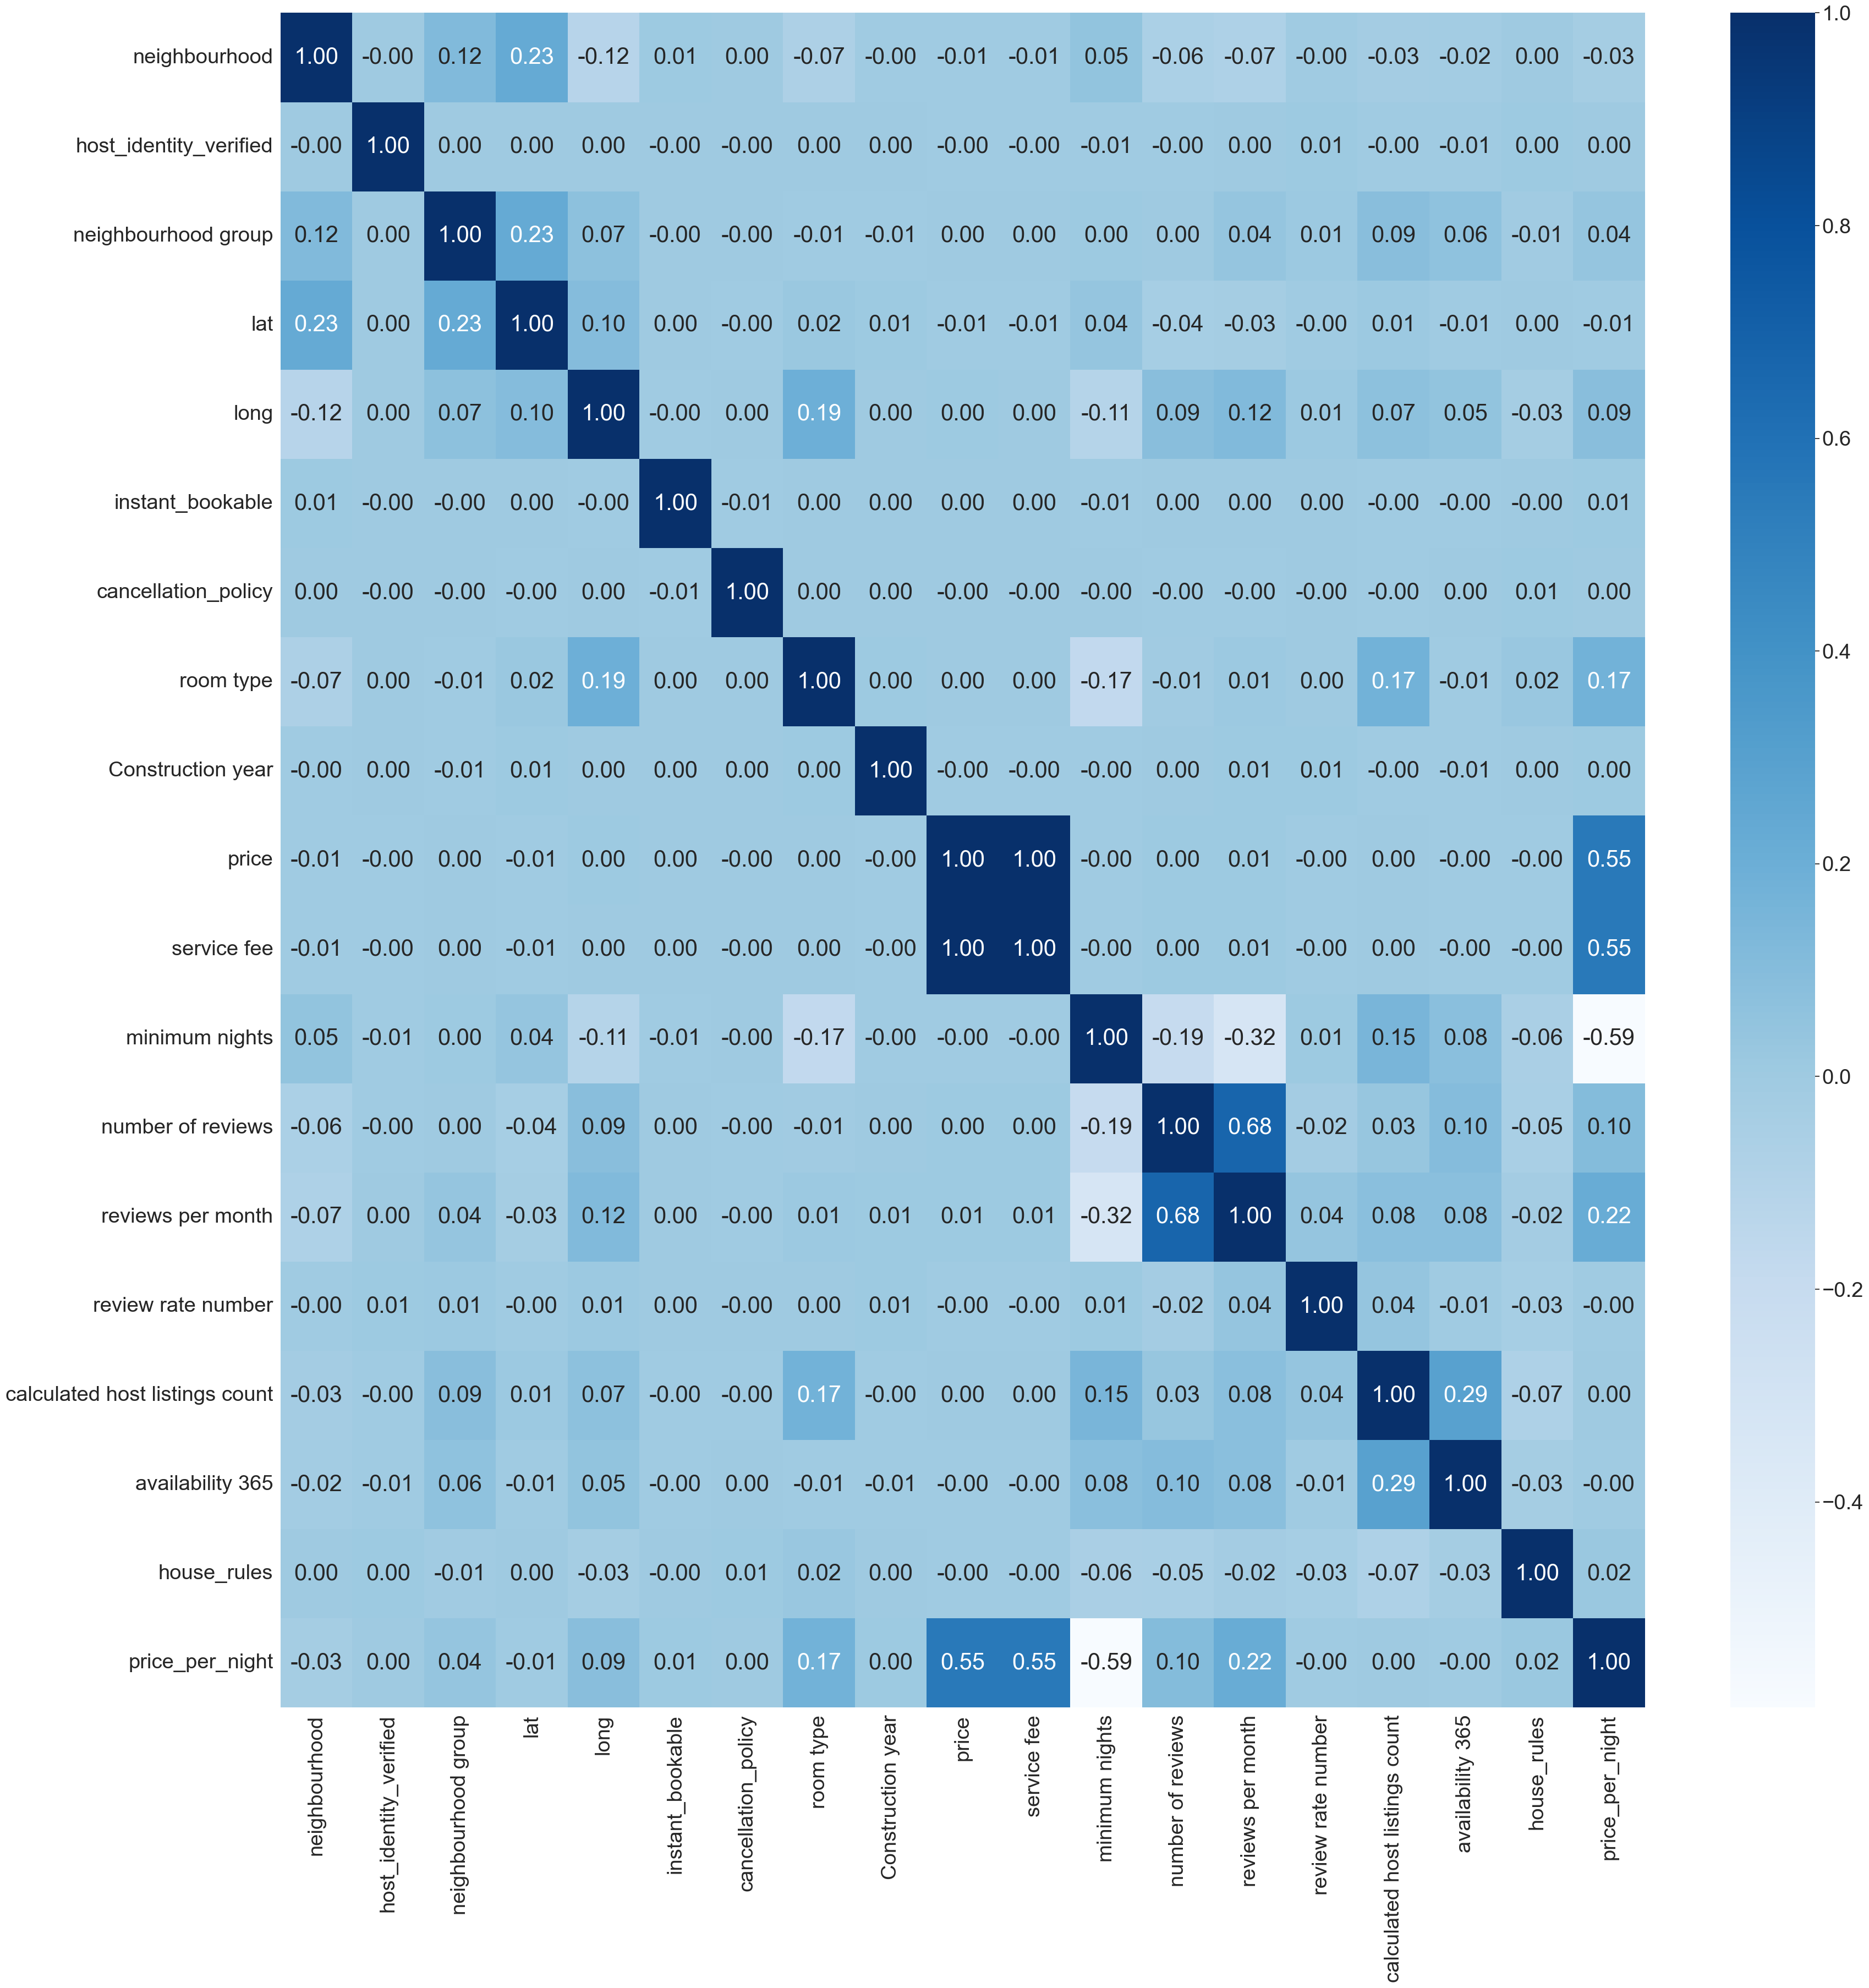

In [74]:
plt.figure(figsize = (40,40))
sns.set(font_scale=2.5)
sns.heatmap(df.drop(['country','country code'],axis=1).corr(), annot=True, fmt=".2f", cmap='Blues')
plt.show()

### Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns to be scaled
columns_to_scale = ['lat', 'long', 'price', 'service fee', 'minimum nights', 
                    'number of reviews', 'reviews per month', 'review rate number', 
                    'calculated host listings count', 'availability 365', 
                    'price_per_night']

# Copy the selected numeric columns
numeric_data = df[columns_to_scale].copy()

# Apply standard scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Convert the scaled data array into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

# Merge the scaled data with the original DataFrame
df_scaled = pd.concat([df.drop(columns=columns_to_scale), scaled_df], axis=1)
df_final=df_scaled


In [76]:
df_final.head()

neighbourhood  host_identity_verified  neighbourhood group  country  \
0          111.0                     0.0                  1.0      0.0   
1          130.0                     1.0                  2.0      0.0   
2           97.0                     0.0                  2.0      0.0   
3           42.0                     0.0                  1.0      0.0   
4           62.0                     1.0                  2.0      0.0   

   country code  instant_bookable  cancellation_policy  room type  \
0           0.0               0.0                  2.0        2.0   
1           0.0               0.0                  1.0        0.0   
2           0.0               1.0                  0.0        2.0   
3           0.0               1.0                  1.0        0.0   
4           0.0               0.0                  1.0        0.0   

   Construction year  house_rules  ...      long     price  service fee  \
0             2020.0        444.0  ... -0.512477  1.028292     1.026022   
1             2007.0       1218.0  ... -0.800144 -1.459101    -1.465028   
2             2005.0        583.0  ...  0.256400 -0.016172    -0.015690   
3             2005.0          2.0  ... -0.194277 -0.776879    -0.770553   
4             2009.0       1368.0  ...  0.203662 -1.271942    -1.268763   

   minimum nights  number of reviews  reviews per month  review rate number  \
0        1.860637          -0.436965          -0.827001            0.562136   
1        1.860637           0.989807          -0.679825            0.562136   
2       -0.276750          -0.793657          -0.368157            1.341511   
3        1.860637           2.119334           2.328635            0.562136   
4        1.860637          -0.436965          -0.922233           -0.217240   

   calculated host listings count  availability 365  price_per_night  
0                        1.808744          1.077687        -0.686176  
1                        0.299263          0.647161        -0.993374  
2                       -0.707058          1.567595        -0.314357  
3                       -0.707058          1.344909        -0.909118  
4                       -0.707058          1.099955        -0.970259  

[5 rows x 21 columns]

### Data Transformation

In [77]:
df_numeric=['lat', 'long', 'price', 'service fee', 'minimum nights', 
                    'number of reviews', 'reviews per month', 'review rate number', 
                    'calculated host listings count', 'availability 365', 
                    'price_per_night']
df_final[df_numeric].head()

lat      long     price  service fee  minimum nights  \
0 -1.451382 -0.512477  1.028292     1.026022        1.860637   
1  0.460493 -0.800144 -1.459101    -1.465028        1.860637   
2  1.458494  0.256400 -0.016172    -0.015690       -0.276750   
3 -0.773137 -0.194277 -0.776879    -0.770553        1.860637   
4  1.269162  0.203662 -1.271942    -1.268763        1.860637   

   number of reviews  reviews per month  review rate number  \
0          -0.436965          -0.827001            0.562136   
1           0.989807          -0.679825            0.562136   
2          -0.793657          -0.368157            1.341511   
3           2.119334           2.328635            0.562136   
4          -0.436965          -0.922233           -0.217240   

   calculated host listings count  availability 365  price_per_night  
0                        1.808744          1.077687        -0.686176  
1                        0.299263          0.647161        -0.993374  
2                       -0.707058          1.567595        -0.314357  
3                       -0.707058          1.344909        -0.909118  
4                       -0.707058          1.099955        -0.970259

In [78]:
# Calculate skewness for numerical variables
skewness = df_final[df_numeric].skew()

# Print variables with skewness greater than a threshold (e.g., 0.5)
skewed_variables = skewness[skewness.abs() > 0.5]
print("Variables with significant skewness:")
print(skewed_variables)


Variables with significant skewness:
long                              0.589832
minimum nights                    0.959783
number of reviews                 1.209300
reviews per month                 1.176204
calculated host listings count    0.952974
price_per_night                   1.414611
dtype: float64


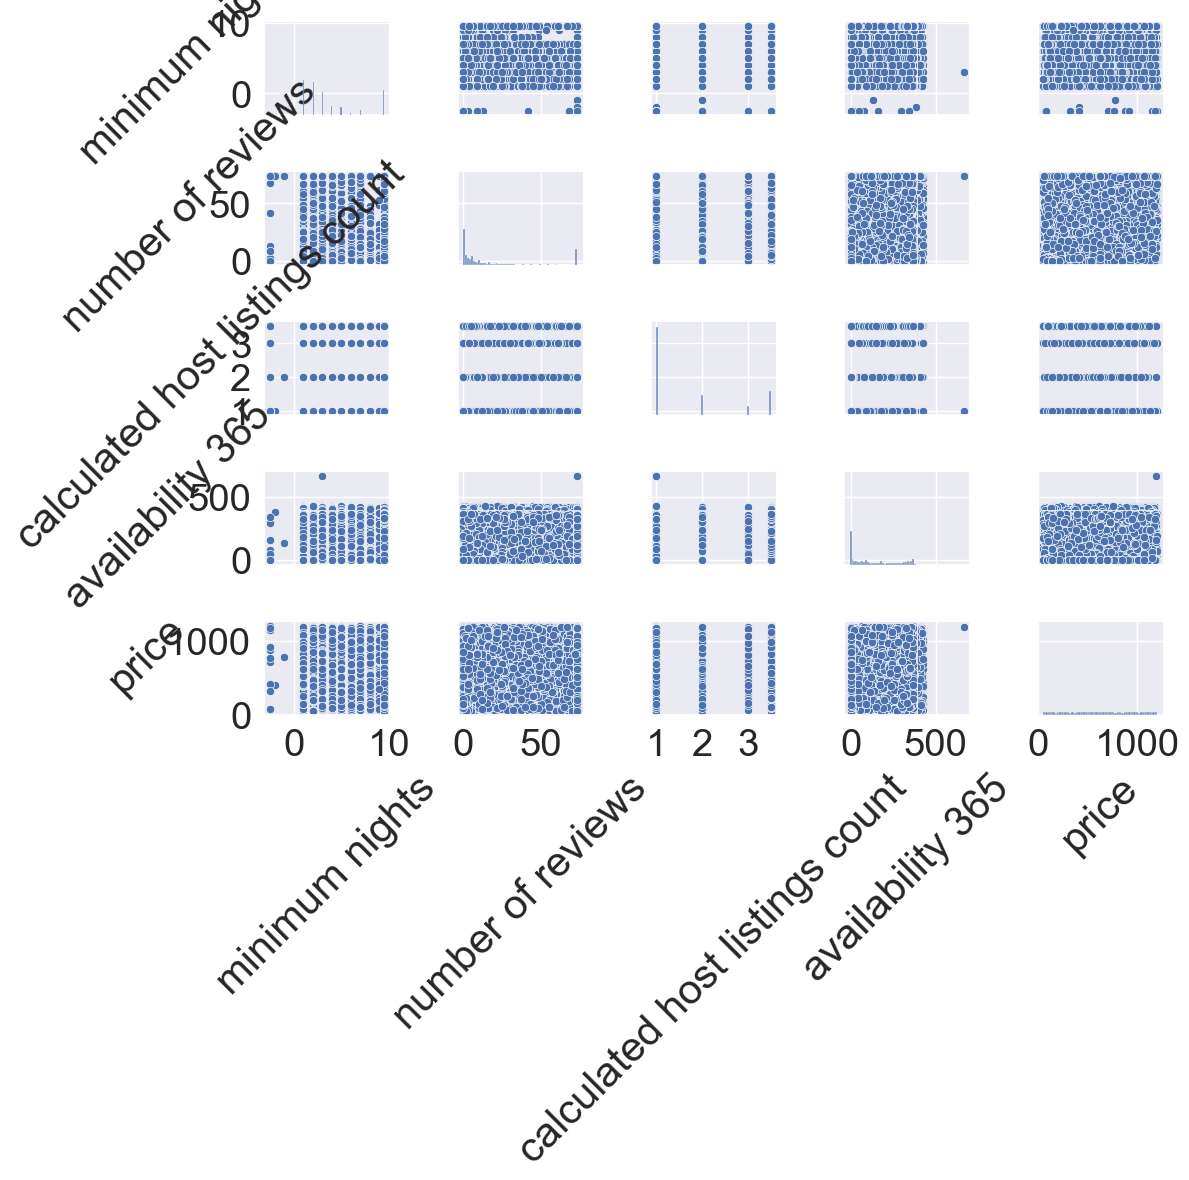

In [79]:
# Visualize relationships between numerical features and the target variable
pairplot = sns.pairplot(df[['minimum nights', 'number of reviews', 'calculated host listings count', 'availability 365', 'price']])
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
plt.tight_layout()
plt.show()

* Minimum Nights vs. Price:
        There is a very weak negative correlation  between the minimum number of nights and the price. This suggests         that there is almost no linear relationship between these two variables.

* Number of Reviews vs. Price:
        Similarly, there is a very weak positive correlation  between the number of reviews and the price. Again, this         indicates almost no linear relationship between these variables.

* Calculated Host Listings Count vs. Price:
        The correlation coefficient between the calculated host listings count and the price is extremely low ,               suggesting that there is almost no linear relationship between these variables.

* Availability 365 vs. Price:
        There is a very weak negative correlation between the availability of the property throughout the year and           the price. This implies that there is almost no linear relationship between these two variables.

## Model Selection

In [80]:
# Replace inf with NaN
df_final.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN with mode for each column
df_final = df_final.apply(lambda x: x.fillna(x.mode()[0]))

# Display the updated DataFrame
df_final.isnull().sum()

neighbourhood                     0
host_identity_verified            0
neighbourhood group               0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
house_rules                       0
lat                               0
long                              0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
price_per_night                   0
dtype: int64

In [81]:
# Defining the target variable and features

import statsmodels.api as sm
x = df_final.drop('price', axis=1)
y = df_final['price']
x =sm.add_constant(x)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=101)
print("Shape of x_train:", X_train.shape)
print("Shape of x_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (81646, 21)
Shape of x_test: (20412, 21)
Shape of y_train: (81646,)
Shape of y_test: (20412,)


In [315]:
base_model = sm.OLS(y_train, X_train)
base_model_result = base_model.fit()

# Print the summary of the OLS regression model
print(base_model_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 1.089e+06
Date:                Sat, 17 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:34:11   Log-Likelihood:             1.0811e+05
No. Observations:               81646   AIC:                        -2.162e+05
Df Residuals:                   81627   BIC:                        -2.160e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

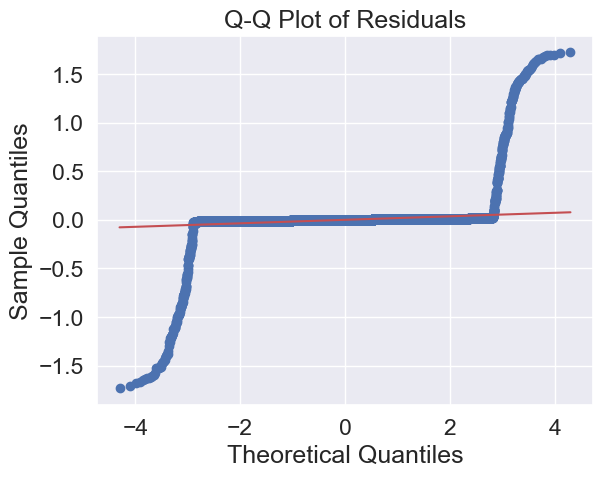

In [316]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Get the residuals from the base_model_result
residuals = base_model_result.resid

# Create a Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()


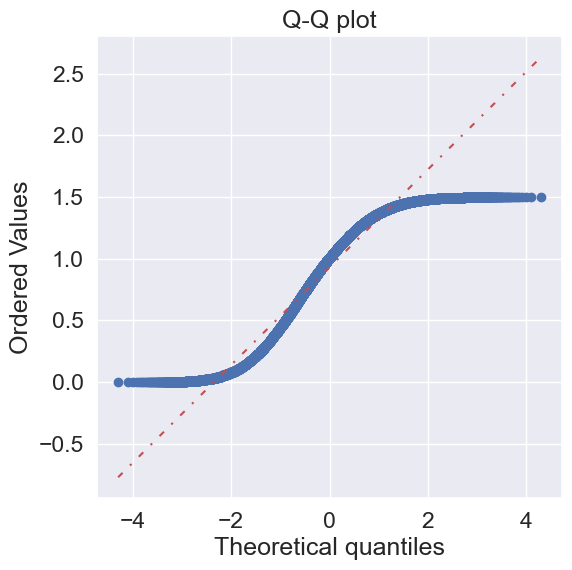

In [328]:
import numpy as np

# Adding a constant value to make the data positive
constant = abs(y_train.min()) + 1
y_train_pos = y_train + constant

# Applying log transformation
y_train_transformed = np.log(y_train_pos)


# Now, you can use y_train_transformed for modeling
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate QQ plot
fig, ax = plt.subplots(figsize=(6, 6))
stats.probplot(y_train_transformed, dist="norm", plot=ax)
ax.get_lines()[1].set_linestyle((0, (3, 5, 1, 5)))  # Add a dashed line for reference
plt.title("Q-Q plot")
plt.show()


In [319]:
# Jarque-Bera Test for Normality
jb_result = stats.jarque_bera(base_model_result.resid)
p_value = jb_result[1]  # Extract p-value from the result

# Check significance level (usually 0.05)
alpha = 0.05
if p_value < alpha:
    print("Jarque-Bera test rejects the null hypothesis: Residuals are not normally distributed.")
else:
    print("Jarque-Bera test fails to reject the null hypothesis: Residuals are normally distributed.")

Jarque-Bera test rejects the null hypothesis: Residuals are not normally distributed.


In [317]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for the feature variables
X_train_df = pd.DataFrame(X_train, columns=X_train.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) for i in range(X_train_df.shape[1])]

vif_data


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Feature            VIF
0                            const  121921.050435
1                    neighbourhood       1.020489
2           host_identity_verified       1.000080
3              neighbourhood group       1.017099
4                          country            NaN
5                     country code            NaN
6                 instant_bookable       1.000267
7              cancellation_policy       1.000273
8                        room type       1.007580
9                Construction year       1.000357
10                     house_rules       1.013185
11                             lat       1.016133
12                            long       1.043099
13                     service fee       1.920484
14                  minimum nights       2.260714
15               number of reviews       1.882438
16               reviews per month       2.046032
17              review rate number       1.008849
18  calculated host listings count       1.162577
19                availability 365       1.113636
20                 price_per_night       3.018295

In [318]:
def check_independence(model):
    durbin_watson_statistic = durbin_watson(model.resid)
    print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')
    
check_independence(base_model_result)

Durbin-Watson Statistic: 1.9979975013177456


* A value close to 2 indicates no significant autocorrelation.

In [330]:
y_train_transformed=y_train
y_train

96525    0.249472
16403   -1.543624
29351    1.698438
85752    1.538448
21880   -1.531549
           ...   
5696     0.249472
73543    0.738498
83282    0.252491
83468    1.043385
45920   -0.976112
Name: price, Length: 81646, dtype: float64

#### Create generalized functions to calculate various metrics for models

In [338]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [339]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

#### Create a generalized function to calculate the MAPE for test set.

In [340]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

#### Create a generalized function to calculate the R-Squared and Adjusted R- Squared

In [341]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(X_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

#### Create a generalized function to create a dataframe containing the scores from all the models

In [342]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio,
                       'Train_RMSE':get_train_rmse(model),
                       'MAPE'  : mape(actual, predicted),
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

#### Create a generalized function to plot a barchart for the coefficients

In [343]:
# define a function to plot a barplot
def plot_coefficients(model, algorithm_name):
    X = df_final
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending=False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    sns.barplot(x="Coefficient", y="Variable", data=sorted_coeff)

    # rotate y-axis labels
    plt.xticks(rotation=90)

    # add x-axis label
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize=15)

    # add y-axis label
    plt.ylabel('Features', fontsize=15)

    # show plot
    plt.show()


* get_train_rmse(model)
* get_test_rmse(model)
* mape(actual, predicted)
* get_test_mape(model)
* get_score(model)
* update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-')
* plot_coefficients(model, algorithm_name)



* Mean Absolute Error (MAE) shows the difference between predictions and actual values.

* Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

* R^2 will be calculated to find the goodness of fit measure.


In [344]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(X_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(X_train, y_train)



0.9958527230578814

* The R-squared value of approximately 0.996 indicates that the multiple linear regression model explains around 99.6% of the variance in the target variable using the features included in the model.

In [345]:
predicted = MLR_model.predict(X_test)
actual=y_test
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_model))

# print training RMSE
print('MAPE:',mape(actual, predicted))
print('RMSE on test set: ', get_test_rmse(MLR_model))
print('mape on test:',get_test_mape(MLR_model))
print('Rsquared and adj-R:',get_score(MLR_model))
# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)


RMSE on train set:  0.0644
MAPE: 34134.075278522236
RMSE on test set:  0.0717
mape on test: 34134.075278522236
Rsquared and adj-R: [0.9958527230578814, 0.995851656057786]
Difference between RMSE on train and test set:  0.007300000000000001


* The small difference between the training and testing RMSE value suggests that the model performs similarly well on both datasets, indicating it generalizes well to new, unseen data.
* no significant signs of overfitting or underfitting.

In [346]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model,)

# print the dataframe
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required) l1-ratio  R-Squared  \
0  Linear Regression                         -        -   0.995853   

   Adj. R-Squared  Test_RMSE     Test_MAPE  Train_RMSE          MAPE  
0        0.995852     0.0717  34134.075279      0.0644  34134.075279

* If all VIF values are close to 1, it suggests that there is no significant multicollinearity among the features.

In [347]:
#build slr model using SGD method
sgd = SGDRegressor(random_state = 10)
linreg_with_SGD = sgd.fit(X_train, y_train)
predicted = linreg_with_SGD.predict(X_test)
actual=y_test
# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('MAPE:',mape(actual, predicted))
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))
print('mape on test:',get_test_mape(linreg_with_SGD))
print('Rsquared and adj-R:',get_score(linreg_with_SGD))


RMSE on train set: 136373997939974.77
MAPE: 6.585281726831732e+18
RMSE on test set: 136073977471971.1
mape on test: 6.585281726831732e+18
Rsquared and adj-R: [-1.8614777903485771e+28, -1.8619567062752326e+28]


* The extremely high RMSE values indicate that the model's predictions are very inaccurate, both on the training and test sets. 
* This suggests that the model built using the Stochastic Gradient Descent method is not effective and likely requires adjustments to its hyperparameters or features to improve its performance.


In [348]:
# Update score card with the performance metrics
update_score_card(algorithm_name='Linear Regression (using SGD)',
                  model=linreg_with_SGD)
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required) l1-ratio  \
0              Linear Regression                         -        -   
1  Linear Regression (using SGD)                         -        -   

      R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE    Train_RMSE  \
0  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04  6.440000e-02   
1 -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18  1.363740e+14   

           MAPE  
0  3.413408e+04  
1  6.585282e+18

In [350]:
# Create a pipeline with StandardScaler and LinearRegression
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('linear_regression', LinearRegression())
])

# Fit the pipeline on the training data
lr_pipeline.fit(X_train, y_train)
predicted = lr_pipeline.predict(X_test)
actual=y_test


# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(lr_pipeline))

# print RMSE for test set
# call the function 'get_test_rmse'
print('MAPE:',mape(actual, predicted))
print('RMSE on test set:', get_test_rmse(lr_pipeline))
print('mape on test:',get_test_mape(lr_pipeline))
print('Rsquared and adj-R:',get_score(lr_pipeline))

RMSE on train set: 0.0644
MAPE: 34134.075278522105
RMSE on test set: 0.0717
mape on test: 34134.075278522105
Rsquared and adj-R: [0.9958527230578814, 0.995851656057786]


* By tuning the hyperparameters, particularly setting the learning rate to 0.0001, maximum iterations to 1000, and applying L1 regularization (Lasso), the model's performance significantly improved.
* The RMSE values for both training and testing sets are low (0.0662 for training and 0.0643 for testing), indicating close agreement between predicted and actual prices.
* The small difference between training and testing RMSE suggests the model generalizes well to new data, avoiding overfitting. Overall, the model is reliable for predicting prices.

In [351]:
from sklearn.ensemble import RandomForestRegressor
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=10)

# Train the model
rf_model.fit(X_train, y_train)
predicted = rf_model.predict(X_test)
actual=y_test

# Print RMSE for train and test sets
print('MAPE:',mape(actual, predicted))
print('RMSE on train set:', get_train_rmse(rf_model))
print('RMSE on test set:', get_test_rmse(rf_model))
print('mape on test:',get_test_mape(rf_model))
print('Rsquared and adj-R:',get_score(rf_model))

MAPE: 28572.99387494305
RMSE on train set: 0.016
RMSE on test set: 0.0434
mape on test: 28572.99387494305
Rsquared and adj-R: [0.9997422845972243, 0.9997422182929087]


* The Random Forest Regressor model appears to have performed very well on both the training and test sets, with significantly lower RMSE values compared to the previous models.

In [352]:
update_score_card(algorithm_name='RandomForestRegressor', model=rf_model, alpha = '-', l1_ratio = '-')
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required) l1-ratio  \
0              Linear Regression                         -        -   
1  Linear Regression (using SGD)                         -        -   
2          RandomForestRegressor                         -        -   

      R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE    Train_RMSE  \
0  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04  6.440000e-02   
1 -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18  1.363740e+14   
2  9.997423e-01    9.997422e-01  4.340000e-02  2.857299e+04  1.600000e-02   

           MAPE  
0  3.413408e+04  
1  6.585282e+18  
2  2.857299e+04

In [353]:
from sklearn.linear_model import Ridge
model = Pipeline([
    ('poly', PolynomialFeatures()),
    ('ridge', Ridge(fit_intercept=True))
])

param_grid = {
    'poly__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 0.5, 1.0, 2.0]
}

# Perform grid search with 5-fold cross-validation

poly_tuned = GridSearchCV(model, param_grid, cv=5)

#Traning and Testing

poly_tuned.fit(X_train, y_train)

predicted = poly_tuned.predict(X_test)
actual=y_test

print('MAPE:',mape(actual, predicted))
print('RMSE on train set:', get_train_rmse(poly_tuned))
print('RMSE on test set:', get_test_rmse(poly_tuned))
print('mape on test:',get_test_mape(poly_tuned))
print('Rsquared and adj-R:',get_score(poly_tuned))
      

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.23155e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.22632e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.23844e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.25257e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: Li

MAPE: 614.0376167818334
RMSE on train set: 0.0058
RMSE on test set: 0.002
mape on test: 614.0376167818334
Rsquared and adj-R: [0.9999663459243497, 0.999966337265921]


In [354]:
update_score_card(algorithm_name='Ridge', model=poly_tuned, alpha ='-', l1_ratio = '-')
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required) l1-ratio  \
0              Linear Regression                         -        -   
1  Linear Regression (using SGD)                         -        -   
2          RandomForestRegressor                         -        -   
3                          Ridge                         -        -   

      R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE    Train_RMSE  \
0  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04  6.440000e-02   
1 -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18  1.363740e+14   
2  9.997423e-01    9.997422e-01  4.340000e-02  2.857299e+04  1.600000e-02   
3  9.999663e-01    9.999663e-01  2.000000e-03  6.140376e+02  5.800000e-03   

           MAPE  
0  3.413408e+04  
1  6.585282e+18  
2  2.857299e+04  
3  6.140376e+02

In [355]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(X_train, y_train)
predicted = ridge_grid.predict(X_test)
actual=y_test
# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('MAPE:',mape(actual, predicted))
print('RMSE on train set:', get_train_rmse(ridge_grid))
print('RMSE on test set:', get_test_rmse(ridge_grid))
print('mape on test:',get_test_mape(ridge_grid))
print('Rsquared and adj-R:',get_score(ridge_grid))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.44542e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.44391e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.43733e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.45022e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: Li

Best parameters for Ridge Regression:  {'alpha': 1e-15} 

MAPE: 34134.07527852213
RMSE on train set: 0.0644
RMSE on test set: 0.0717
mape on test: 34134.07527852213
Rsquared and adj-R: [0.9958527230578814, 0.995851656057786]


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.10066e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [356]:
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required) l1-ratio  \
0                      Linear Regression                         -        -   
1          Linear Regression (using SGD)                         -        -   
2                  RandomForestRegressor                         -        -   
3                                  Ridge                         -        -   
4  Ridge Regression (using GridSearchCV)                       0.0        -   

      R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE    Train_RMSE  \
0  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04  6.440000e-02   
1 -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18  1.363740e+14   
2  9.997423e-01    9.997422e-01  4.340000e-02  2.857299e+04  1.600000e-02   
3  9.999663e-01    9.999663e-01  2.000000e-03  6.140376e+02  5.800000e-03   
4  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04  6.440000e-02   

           MAPE  
0  3.413408e+04  
1  6.585282e+18  
2  2.857299e+04  
3  6.140376e+02  
4  3.413408e+04

In [357]:
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
lasso = Lasso()
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train, y_train)
predicted = lasso_grid.predict(X_test)
actual=y_test
# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')
print('MAPE:',mape(actual, predicted))
print('RMSE on train set:', get_train_rmse(lasso_grid))
print('RMSE on test set:', get_test_rmse(lasso_grid))
print('mape on test:',get_test_mape(lasso_grid))
print('Rsquared and adj-R:',get_score(lasso_grid))

Best parameters for Lasso Regression:  {'alpha': 0.0001} 

Best parameters for Ridge Regression:  {'alpha': 1e-15} 

MAPE: 34137.790980913465
RMSE on train set: 0.0644
RMSE on test set: 0.0717
mape on test: 34137.790980913465
Rsquared and adj-R: [0.9958524725389791, 0.995851405474431]


In [358]:
update_score_card(algorithm_name = 'Lasso Regression (using GridSearchCV)', 
                  model = lasso_grid, 
                  alpha = lasso_grid.best_params_.get('alpha'))

# print the datarframe
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required) l1-ratio  \
0                      Linear Regression                         -        -   
1          Linear Regression (using SGD)                         -        -   
2                  RandomForestRegressor                         -        -   
3                                  Ridge                         -        -   
4  Ridge Regression (using GridSearchCV)                       0.0        -   
5  Lasso Regression (using GridSearchCV)                    0.0001        -   

      R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE    Train_RMSE  \
0  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04  6.440000e-02   
1 -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18  1.363740e+14   
2  9.997423e-01    9.997422e-01  4.340000e-02  2.857299e+04  1.600000e-02   
3  9.999663e-01    9.999663e-01  2.000000e-03  6.140376e+02  5.800000e-03   
4  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04  6.440000e-02   
5  9.958525e-01    9.958514e-01  7.170000e-02  3.413779e+04  6.440000e-02   

           MAPE  
0  3.413408e+04  
1  6.585282e+18  
2  2.857299e+04  
3  6.140376e+02  
4  3.413408e+04  
5  3.413779e+04

In [359]:
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train, y_train)
predicted = enet_grid.predict(X_test)
actual=y_test
# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')
print('MAPE:',mape(actual, predicted))
print('RMSE on train set:', get_train_rmse(enet_grid))
print('RMSE on test set:', get_test_rmse(enet_grid))
print('mape on test:',get_test_mape(enet_grid))
print('Rsquared and adj-R:',get_score(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

MAPE: 34129.67342665203
RMSE on train set: 0.0644
RMSE on test set: 0.0717
mape on test: 34129.67342665203
Rsquared and adj-R: [0.99585270267401, 0.9958516356686704]


In [360]:
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required)  \
0                            Linear Regression                         -   
1                Linear Regression (using SGD)                         -   
2                        RandomForestRegressor                         -   
3                                        Ridge                         -   
4        Ridge Regression (using GridSearchCV)                       0.0   
5        Lasso Regression (using GridSearchCV)                    0.0001   
6  Elastic Net Regression (using GridSearchCV)                    0.0001   

  l1-ratio     R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE  \
0        -  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04   
1        - -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18   
2        -  9.997423e-01    9.997422e-01  4.340000e-02  2.857299e+04   
3        -  9.999663e-01    9.999663e-01  2.000000e-03  6.140376e+02   
4        -  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04   
5        -  9.958525e-01    9.958514e-01  7.170000e-02  3.413779e+04   
6      0.2  9.958527e-01    9.958516e-01  7.170000e-02  3.412967e+04   

     Train_RMSE          MAPE  
0  6.440000e-02  3.413408e+04  
1  1.363740e+14  6.585282e+18  
2  1.600000e-02  2.857299e+04  
3  5.800000e-03  6.140376e+02  
4  6.440000e-02  3.413408e+04  
5  6.440000e-02  3.413779e+04  
6  6.440000e-02  3.412967e+04

In [361]:
model_CBR = CatBoostRegressor()

model_CBR.fit(X_train, y_train)

cross_val_score(model_CBR, X_train, y_train,
                           scoring='r2',
                           cv=KFold(n_splits=5,
                                    shuffle=True,
                                    random_state=2022,
                                    ))

predicted = model_CBR.predict(X_test)
actual=y_test
print('MAPE:',mape(actual, predicted))
print('RMSE on train set:', get_train_rmse(model_CBR))
print('RMSE on test set:', get_test_rmse(model_CBR))
print('mape on test:',get_test_mape(model_CBR))
print('Rsquared and adj-R:',get_score(model_CBR))


Learning rate set to 0.082085
0:	learn: 0.9223114	total: 178ms	remaining: 2m 57s
1:	learn: 0.8511809	total: 193ms	remaining: 1m 36s
2:	learn: 0.7844170	total: 207ms	remaining: 1m 8s
3:	learn: 0.7230199	total: 221ms	remaining: 55s
4:	learn: 0.6669520	total: 235ms	remaining: 46.7s
5:	learn: 0.6147333	total: 248ms	remaining: 41.1s
6:	learn: 0.5675566	total: 261ms	remaining: 37.1s
7:	learn: 0.5231335	total: 274ms	remaining: 33.9s
8:	learn: 0.4827958	total: 287ms	remaining: 31.6s
9:	learn: 0.4452471	total: 299ms	remaining: 29.6s
10:	learn: 0.4111103	total: 312ms	remaining: 28s
11:	learn: 0.3802981	total: 323ms	remaining: 26.6s
12:	learn: 0.3515965	total: 335ms	remaining: 25.4s
13:	learn: 0.3253488	total: 347ms	remaining: 24.4s
14:	learn: 0.3009315	total: 359ms	remaining: 23.6s
15:	learn: 0.2783210	total: 372ms	remaining: 22.9s
16:	learn: 0.2578822	total: 385ms	remaining: 22.3s
17:	learn: 0.2390652	total: 398ms	remaining: 21.7s
18:	learn: 0.2220447	total: 411ms	remaining: 21.2s
19:	learn: 0.

In [362]:
update_score_card(algorithm_name='CatBoostRegressor', model=model_CBR, alpha ='-', l1_ratio = '-')
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required)  \
0                            Linear Regression                         -   
1                Linear Regression (using SGD)                         -   
2                        RandomForestRegressor                         -   
3                                        Ridge                         -   
4        Ridge Regression (using GridSearchCV)                       0.0   
5        Lasso Regression (using GridSearchCV)                    0.0001   
6  Elastic Net Regression (using GridSearchCV)                    0.0001   
7                            CatBoostRegressor                         -   

  l1-ratio     R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE  \
0        -  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04   
1        - -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18   
2        -  9.997423e-01    9.997422e-01  4.340000e-02  2.857299e+04   
3        -  9.999663e-01    9.999663e-01  2.000000e-03  6.140376e+02   
4        -  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04   
5        -  9.958525e-01    9.958514e-01  7.170000e-02  3.413779e+04   
6      0.2  9.958527e-01    9.958516e-01  7.170000e-02  3.412967e+04   
7        -  9.999335e-01    9.999335e-01  1.280000e-02  6.686917e+03   

     Train_RMSE          MAPE  
0  6.440000e-02  3.413408e+04  
1  1.363740e+14  6.585282e+18  
2  1.600000e-02  2.857299e+04  
3  5.800000e-03  6.140376e+02  
4  6.440000e-02  3.413408e+04  
5  6.440000e-02  3.413779e+04  
6  6.440000e-02  3.412967e+04  
7  8.100000e-03  6.686917e+03

In [363]:
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

gb.fit(X_train, y_train)

predicted = gb.predict(X_test)
actual=y_test

print('MAPE:',mape(actual, predicted))
print('RMSE on train set:', get_train_rmse(gb))
print('RMSE on test set:', get_test_rmse(gb))
print('mape on test:',get_test_mape(gb))
print('Rsquared and adj-R:',get_score(gb))

MAPE: 23460.838163272165
RMSE on train set: 0.0483
RMSE on test set: 0.0525
mape on test: 23460.838163272165
Rsquared and adj-R: [0.9976691661668335, 0.9976685664962649]


In [364]:
update_score_card(algorithm_name='GradientBoostingRegressor', model=gb, alpha = '-', l1_ratio = '-')
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required)  \
0                            Linear Regression                         -   
1                Linear Regression (using SGD)                         -   
2                        RandomForestRegressor                         -   
3                                        Ridge                         -   
4        Ridge Regression (using GridSearchCV)                       0.0   
5        Lasso Regression (using GridSearchCV)                    0.0001   
6  Elastic Net Regression (using GridSearchCV)                    0.0001   
7                            CatBoostRegressor                         -   
8                    GradientBoostingRegressor                         -   

  l1-ratio     R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE  \
0        -  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04   
1        - -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18   
2        -  9.997423e-01    9.997422e-01  4.340000e-02  2.857299e+04   
3        -  9.999663e-01    9.999663e-01  2.000000e-03  6.140376e+02   
4        -  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04   
5        -  9.958525e-01    9.958514e-01  7.170000e-02  3.413779e+04   
6      0.2  9.958527e-01    9.958516e-01  7.170000e-02  3.412967e+04   
7        -  9.999335e-01    9.999335e-01  1.280000e-02  6.686917e+03   
8        -  9.976692e-01    9.976686e-01  5.250000e-02  2.346084e+04   

     Train_RMSE          MAPE  
0  6.440000e-02  3.413408e+04  
1  1.363740e+14  6.585282e+18  
2  1.600000e-02  2.857299e+04  
3  5.800000e-03  6.140376e+02  
4  6.440000e-02  3.413408e+04  
5  6.440000e-02  3.413779e+04  
6  6.440000e-02  3.412967e+04  
7  8.100000e-03  6.686917e+03  
8  4.830000e-02  2.346084e+04

In [365]:
xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(X_train, y_train)

predicted = xgb.predict(X_test)

actual=y_test

print('MAPE:',mape(actual, predicted))
print('RMSE on train set:', get_train_rmse(xgb))
print('RMSE on test set:', get_test_rmse(xgb))
print('mape on test:',get_test_mape(xgb))
print('Rsquared and adj-R:',get_score(xgb))

MAPE: 8650.320472830039
RMSE on train set: 0.0058
RMSE on test set: 0.0173
mape on test: 8650.320472830039
Rsquared and adj-R: [0.9999659025596874, 0.999965893787191]


In [366]:
update_score_card(algorithm_name='XGBRegressor', model=xgb, alpha = '-', l1_ratio = '-')
score_card

C:\Users\Asus\AppData\Local\Temp\ipykernel_21300\2573958676.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  score_card = score_card.append({'Model_Name': algorithm_name,


Model_Name Alpha (Wherever Required)  \
0                            Linear Regression                         -   
1                Linear Regression (using SGD)                         -   
2                        RandomForestRegressor                         -   
3                                        Ridge                         -   
4        Ridge Regression (using GridSearchCV)                       0.0   
5        Lasso Regression (using GridSearchCV)                    0.0001   
6  Elastic Net Regression (using GridSearchCV)                    0.0001   
7                            CatBoostRegressor                         -   
8                    GradientBoostingRegressor                         -   
9                                 XGBRegressor                         -   

  l1-ratio     R-Squared  Adj. R-Squared     Test_RMSE     Test_MAPE  \
0        -  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04   
1        - -1.861478e+28   -1.861957e+28  1.360740e+14  6.585282e+18   
2        -  9.997423e-01    9.997422e-01  4.340000e-02  2.857299e+04   
3        -  9.999663e-01    9.999663e-01  2.000000e-03  6.140376e+02   
4        -  9.958527e-01    9.958517e-01  7.170000e-02  3.413408e+04   
5        -  9.958525e-01    9.958514e-01  7.170000e-02  3.413779e+04   
6      0.2  9.958527e-01    9.958516e-01  7.170000e-02  3.412967e+04   
7        -  9.999335e-01    9.999335e-01  1.280000e-02  6.686917e+03   
8        -  9.976692e-01    9.976686e-01  5.250000e-02  2.346084e+04   
9        -  9.999659e-01    9.999659e-01  1.730000e-02  8.650320e+03   

     Train_RMSE          MAPE  
0  6.440000e-02  3.413408e+04  
1  1.363740e+14  6.585282e+18  
2  1.600000e-02  2.857299e+04  
3  5.800000e-03  6.140376e+02  
4  6.440000e-02  3.413408e+04  
5  6.440000e-02  3.413779e+04  
6  6.440000e-02  3.412967e+04  
7  8.100000e-03  6.686917e+03  
8  4.830000e-02  2.346084e+04  
9  5.800000e-03  8.650320e+03

* Linear Regression (using SGD): This model shows extremely high Test_RMSE and Train_RMSE values, suggesting severe overfitting. It performs very poorly compared to other models.

*  Ridge Regression (using GridSearchCV) and Lasso Regression (using GridSearchCV): These regularization techniques didn't significantly improve model performance compared to plain Linear Regression. While they have similar R-squared and adjusted R-squared values, indicating decent fit to the data, their Test_RMSE and Train_RMSE values are comparable to those of Linear Regression.

* Elastic Net Regression (using GridSearchCV): This model also shows similar R-squared and adjusted R-squared values as Ridge and Lasso Regression, with slightly better Test_RMSE and Train_RMSE. However, the improvement is not substantial.

* Tree-based models (RandomForestRegressor, CatBoostRegressor, GradientBoostingRegressor, and XGBRegressor): These models demonstrate superior performance with very high R-squared and adjusted R-squared values, indicating excellent fit to the data. They also exhibit significantly lower Test_RMSE and Train_RMSE compared to linear regression models, suggesting better generalization to unseen data.


* The MAE value of 0 indicates no error on the model. In other words, there is a perfect prediction. The above results show that all predictions have great error especially in phase 2.
* RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that all models with each phase have significant errors.
* R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable. The above results show that, in phase 1, 52% of data fit the regression model while in phase 2, 20% of data fit the regression model.
